<div style="text-align: center;">
    <img src="C:\Users\Dhruba\OneDrive\Pictures\iM1IxJ8.jpg" alt="Alt Text" width=1100 height=100>
</div>

- Analysed by Dhruba

### Problem Statement

**Objective:**
To perform a comprehensive exploratory data analysis (EDA) on a dataset containing basic customer details and extensive credit-related information. The goal is to generate new, informative features, develop a hypothetical credit score model, and identify meaningful patterns, anomalies, and insights that can inform credit risk assessment and customer segmentation strategies.

**Key Tasks:**
1. **Data Understanding and Cleaning:**
   - Examine the dataset for missing values, inconsistencies, and outliers.
   - Clean and preprocess the data to ensure it is ready for analysis.

2. **Feature Engineering:**
   - Create new features based on existing customer and credit-related data.
   - Explore interactions between variables to identify potential predictors for credit risk.

3. **Credit Score Calculation:**
   - Develop a hypothetical credit score model using the available features.
   - Assign credit scores to customers based on their credit behavior and financial profiles.

4. **Pattern and Anomaly Detection:**
   - Identify trends and patterns in the data, such as correlations between income levels, credit utilization, and credit scores.
   - Detect anomalies that could indicate potential fraud or high-risk customers.

5. **Insight Generation:**
   - Derive actionable insights from the analysis to improve credit risk management.
   - Provide recommendations for optimizing customer segmentation, credit offerings, and riskr credit behavior and risk.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import copy
import warnings
warnings.filterwarnings('ignore')

### Data Understanding and Cleaning:

In [2]:
data = pd.read_csv(r"D:\Scaler\Credit_EDA_scoring\Credit_score.csv", low_memory=False)

In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

* we can see that there are many columns which has nul values. But apart from that many columns has irrergular values in term of data types. Like Age has missing cells and some age values are given liek '8969_' which is not correct. In this case we will group by customer ID and replace the such data types mode of that group.
* Same we will do for all columns where we have such problems.
* This descripencies in data have been checked in excel also.

### Correcting AGE column

In [7]:
# convert age to numeric and fill 0 wherever its na.
def correcting_age(group):
    group['Age'] = pd.to_numeric(group['Age'], errors='coerce')
    group['Age'] = group['Age'].fillna(0).astype(int)
    group['Age'] = group['Age'].astype('int')

    return group

data = data.groupby('Customer_ID').apply(correcting_age)
data.reset_index(drop=True, inplace=True)
data.head() 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1628a,CUS_0x1000,January,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,10.0,Bad,1562.91,26.612093,10 Years and 2 Months,Yes,42.94109,244.750283,Low_spent_Large_value_payments,252.9247932
1,0x1628b,CUS_0x1000,February,NaN,17,913-74-1218,Lawyer,30625.94,NaN,6,...,11.0,Bad,1562.91,29.439759,10 Years and 3 Months,Yes,42.94109,176.1325667,High_spent_Small_value_payments,311.5425096
2,0x1628c,CUS_0x1000,March,Alistair Barrf,0,913-74-1218,Lawyer,30625.94_,2706.161667,6,...,11.0,Bad,1562.91,38.285928,10 Years and 4 Months,Yes,42.94109,109.0565188,High_spent_Medium_value_payments,368.6185575
3,0x1628d,CUS_0x1000,April,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,11.0,Bad,1562.91,32.843081,10 Years and 5 Months,Yes,42.94109,87.90990881,!@9#%8,419.7651674
4,0x1628e,CUS_0x1000,May,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,11.0,Bad,1562.91,32.330508,10 Years and 6 Months,Yes,42.94109,191.8347675,Low_spent_Large_value_payments,305.8403087


In [8]:
data.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1628a,CUS_0x1000,January,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,10.0,Bad,1562.91,26.612093,10 Years and 2 Months,Yes,42.94109,244.750283,Low_spent_Large_value_payments,252.9247932
1,0x1628b,CUS_0x1000,February,NaN,17,913-74-1218,Lawyer,30625.94,NaN,6,...,11.0,Bad,1562.91,29.439759,10 Years and 3 Months,Yes,42.94109,176.1325667,High_spent_Small_value_payments,311.5425096
2,0x1628c,CUS_0x1000,March,Alistair Barrf,0,913-74-1218,Lawyer,30625.94_,2706.161667,6,...,11.0,Bad,1562.91,38.285928,10 Years and 4 Months,Yes,42.94109,109.0565188,High_spent_Medium_value_payments,368.6185575
3,0x1628d,CUS_0x1000,April,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,11.0,Bad,1562.91,32.843081,10 Years and 5 Months,Yes,42.94109,87.90990881,!@9#%8,419.7651674
4,0x1628e,CUS_0x1000,May,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,11.0,Bad,1562.91,32.330508,10 Years and 6 Months,Yes,42.94109,191.8347675,Low_spent_Large_value_payments,305.8403087


In [9]:
# min age
data['Age'].min()

-500

In [10]:
# replace -50 with 100 and we will replace it later
data['Age'] = data['Age'].replace(-500, 100)

In [11]:
# max age
data['Age'].min()

0

In [12]:
data['Age'] = data['Age'].replace(0,1000)

In [13]:
data['Age'].min()

14

In [14]:
data['Age'].max()

8698

In [15]:
# replace 0 age with mode of the age for each customer ID

def replace_with_mode_if_above_mean(data):
    # Function to apply for each group (each name)
    def replace_age(group):
        mean_age = group['Age'].mean() 
        mode_age = group['Age'].mode()[0] 
        group['Age'] = group['Age'].apply(lambda x: mode_age if x > np.max(mode_age) else x)
        return group

    
    data = data.groupby('Customer_ID').apply(replace_age)
    
    return data

# Apply the function to the DataFrame
cleaned_df = replace_with_mode_if_above_mean(data)


In [16]:
# resset index
cleaned_df.reset_index(drop=True, inplace=True)

In [17]:
cleaned_df['Age'].max()

1000

In [18]:
# lets see what are the data still with 1000 age
cleaned_df[cleaned_df['Age']==1000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
11665,0x16b4f,CUS_0x278f,February,Georgina Prodhanm,1000,094-63-0433,Lawyer,14646.28,1186.523333,6,...,7.0,Standard,522.36,38.793910,16 Years and 5 Months,Yes,45.649894,26.86228875,!@9#%8,306.1401507
11667,0x16b51,CUS_0x278f,April,Georgina Prodhanm,1000,094-63-0433,Lawyer,14646.28,1186.523333,6,...,9.0,Standard,522.36,25.720290,16 Years and 7 Months,Yes,45.649894,65.86153441,Low_spent_Small_value_payments,297.1409051
11669,0x16b53,CUS_0x278f,June,Georgina Prodhanm,1000,094-63-0433,Lawyer,14646.28_,1186.523333,6,...,9.0,Standard,522.36,34.913538,16 Years and 9 Months,Yes,45.649894,126.8866957,Low_spent_Small_value_payments,236.1157438
11670,0x16b54,CUS_0x278f,July,Georgina Prodhanm,1000,094-63-0433,_______,14646.28,NaN,6,...,9.0,Standard,522.36,27.925636,16 Years and 10 Months,Yes,45.649894,121.5030185,Low_spent_Small_value_payments,241.4994209
11671,0x16b55,CUS_0x278f,August,Georgina Prodhanm,1000,094-63-0433,Lawyer,14646.28,1186.523333,6,...,9.0,Standard,522.36,29.158224,NaN,NM,45.649894,101.7541391,Low_spent_Medium_value_payments,251.2483004
23897,0x71a7,CUS_0x3f18,February,Carolinez,1000,309-95-7818,Scientist,30988.54,2827.378333,6,...,8.0,Standard,189.28,32.007157,13 Years and 5 Months,Yes,158.549241,288.7474575,Low_spent_Medium_value_payments,115.4411345
23899,0x71a9,CUS_0x3f18,April,Carolinez,1000,309-95-7818,Scientist,30988.54,2827.378333,6,...,8.0,Standard,189.28,40.018324,13 Years and 7 Months,Yes,158.549241,NaN,Low_spent_Small_value_payments,132.5509707
23900,0x71aa,CUS_0x3f18,May,Carolinez,1000,309-95-7818,Scientist,30988.54,2827.378333,6,...,8.0,Standard,189.28,30.903041,13 Years and 8 Months,Yes,158.549241,141.5297454,Low_spent_Medium_value_payments,262.6588466
23902,0x71ac,CUS_0x3f18,July,Carolinez,1000,309-95-7818,_______,30988.54,2827.378333,6,...,8.0,Standard,189.28,36.733988,13 Years and 10 Months,Yes,158.549241,32.71702275,High_spent_Medium_value_payments,341.4715692
32696,0x223f2,CUS_0x4e43,January,Karen Jacobsy,1000,781-53-2870,Accountant,8295.87,883.322500,7,...,8.0,Bad,3632.72,34.455431,13 Years and 5 Months,Yes,51.880091,48.84930694,Low_spent_Small_value_payments,277.6028523


In [19]:
cleaned_df[cleaned_df['Customer_ID']=='CUS_0x278f']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
11664,0x16b4e,CUS_0x278f,January,Georgina Prodhanm,25,094-63-0433,Lawyer,14646.28,1186.523333,6,...,7.0,Standard,522.36,33.710248,16 Years and 4 Months,Yes,81637.000000,19.29273007,!@9#%8,303.7097094
11665,0x16b4f,CUS_0x278f,February,Georgina Prodhanm,1000,094-63-0433,Lawyer,14646.28,1186.523333,6,...,7.0,Standard,522.36,38.793910,16 Years and 5 Months,Yes,45.649894,26.86228875,!@9#%8,306.1401507
11666,0x16b50,CUS_0x278f,March,Georgina Prodhanm,25,#F%$D@*&8,Lawyer,14646.28,1186.523333,6,...,7.0,Standard,522.36,34.681603,16 Years and 6 Months,Yes,45.649894,30.90567388,High_spent_Medium_value_payments,292.0967656
11667,0x16b51,CUS_0x278f,April,Georgina Prodhanm,1000,094-63-0433,Lawyer,14646.28,1186.523333,6,...,9.0,Standard,522.36,25.720290,16 Years and 7 Months,Yes,45.649894,65.86153441,Low_spent_Small_value_payments,297.1409051
11668,0x16b52,CUS_0x278f,May,Georgina Prodhanm,25,094-63-0433,Lawyer,14646.28,1186.523333,6,...,9.0,Standard,522.36,35.631219,16 Years and 8 Months,Yes,45.649894,77.8482324,Low_spent_Medium_value_payments,275.1542071
11669,0x16b53,CUS_0x278f,June,Georgina Prodhanm,1000,094-63-0433,Lawyer,14646.28_,1186.523333,6,...,9.0,Standard,522.36,34.913538,16 Years and 9 Months,Yes,45.649894,126.8866957,Low_spent_Small_value_payments,236.1157438
11670,0x16b54,CUS_0x278f,July,Georgina Prodhanm,1000,094-63-0433,_______,14646.28,NaN,6,...,9.0,Standard,522.36,27.925636,16 Years and 10 Months,Yes,45.649894,121.5030185,Low_spent_Small_value_payments,241.4994209
11671,0x16b55,CUS_0x278f,August,Georgina Prodhanm,1000,094-63-0433,Lawyer,14646.28,1186.523333,6,...,9.0,Standard,522.36,29.158224,NaN,NM,45.649894,101.7541391,Low_spent_Medium_value_payments,251.2483004


In [198]:
# we can see for some customer id 1000 is the mode lets correct it.

In [20]:
# replace 1000 age by another age vallue which with min or max age.
def replace_with_mode_if_above_mean(data):
    # Function to apply for each group (each name)
    def replace_age(group):
        max_age = group['Age'].max() 
        min_age = group['Age'].min() 
        group['Age'] = group['Age'].apply(lambda x: min_age if x > (1+min_age) else x)
        return group

    
    data = data.groupby('Customer_ID').apply(replace_age)
    
    return data

# Apply the function to the DataFrame
cleaned_df = replace_with_mode_if_above_mean(cleaned_df)


In [21]:
cleaned_df.reset_index(drop=True, inplace=True)

In [22]:
df = copy.deepcopy(cleaned_df)

### Correcting NAME column

In [23]:
# replace the irregular value with mode of the group
def correcting_Name(group):
    mode_Name = group['Name'].mode()

    if not mode_Name.empty:
        mode_Name_value = mode_Name[0]
    else:
        mode_Name_value = np.nan

    group['Name'] = group['Name'].fillna(mode_Name_value)

    return group

df = df.groupby('Customer_ID').apply(correcting_Name)
df.reset_index(drop=True, inplace=True)

### Correcting SSN column

In [24]:
df['SSN'].unique()

array(['913-74-1218', '#F%$D@*&8', '063-67-6938', ..., '541-92-8371',
       '226-86-7294', '832-88-8320'], dtype=object)

In [25]:
# replace the irregular value with the mode of the value
import re

def correcting_SSN(group):
    mode_SSN = group['SSN'].mode()[0]

    patter = re.compile(r'^\d{3}-\d{2}-\d{4}$')

    if mode_SSN == '#F%$D@*&8':
        SSN = group['SSN'].sort_values(ascending=False).unique()[0]
        group['SSN'] = group['SSN'].apply(lambda x: SSN if not patter.match(x) else x)
    else:
        group['SSN'] = group['SSN'].apply(lambda x: mode_SSN if not patter.match(x) else x)

    return group

df = df.groupby('Customer_ID').apply(correcting_SSN)
df.reset_index(drop=True, inplace=True)

In [26]:
df['SSN'].unique()

array(['913-74-1218', '063-67-6938', '238-62-0395', ..., '541-92-8371',
       '226-86-7294', '832-88-8320'], dtype=object)

In [27]:
# checking the total na again
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

### Correcting OCCUPATION column

In [28]:
df['Occupation'].unique()

array(['Lawyer', 'Mechanic', '_______', 'Media_Manager', 'Doctor',
       'Journalist', 'Accountant', 'Manager', 'Entrepreneur', 'Scientist',
       'Architect', 'Teacher', 'Engineer', 'Writer', 'Developer',
       'Musician'], dtype=object)

In [29]:
# replace ________ with mode of the group
def correcting_Occupation(group):
    mode_Occupation = group['Occupation'].mode()[0]

    group['Occupation'] = group['Occupation'].replace('_______',mode_Occupation)

    Occupation = group['Occupation'].unique() # to change thase values where mode itself is ______ .
    if len(Occupation) > 1:
        group['Occupation'] = group['Occupation'].replace('_______',Occupation[1])

    return group

df = df.groupby('Customer_ID').apply(correcting_Occupation)
df.reset_index(drop=True, inplace=True)

In [30]:
# unique number of Occupation
df['Occupation'].nunique()

15

In [31]:
df['Occupation'].unique()

array(['Lawyer', 'Mechanic', 'Media_Manager', 'Doctor', 'Journalist',
       'Accountant', 'Manager', 'Entrepreneur', 'Scientist', 'Architect',
       'Teacher', 'Engineer', 'Writer', 'Developer', 'Musician'],
      dtype=object)

### Correcting ANNUAL INCOME column

In [32]:
# replace the irregual value with mode of the group
def correcting_Annual_Income(group):
    group['Annual_Income'] = pd.to_numeric(group['Annual_Income'], errors='coerce')
    mode_Annual_Income = group['Annual_Income'].mode()

    if not mode_Annual_Income.empty:
        mode_Annual_Income_value = mode_Annual_Income[0]
    else:
        mode_Annual_Income_value = np.nan

    group['Annual_Income'] = group['Annual_Income'].fillna(mode_Annual_Income_value)
    # group['Age'] = group['Age'].fillna(0).astype(int)
    group['Annual_Income'] = group['Annual_Income'].astype('int64')

    return group

df = df.groupby('Customer_ID').apply(correcting_Annual_Income)
df.reset_index(drop=True, inplace=True)

In [33]:
df[df['Customer_ID']=='CUS_0x278f']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
11664,0x16b4e,CUS_0x278f,January,Georgina Prodhanm,25,094-63-0433,Lawyer,14646,1186.523333,6,...,7.0,Standard,522.36,33.710248,16 Years and 4 Months,Yes,81637.000000,19.29273007,!@9#%8,303.7097094
11665,0x16b4f,CUS_0x278f,February,Georgina Prodhanm,25,094-63-0433,Lawyer,14646,1186.523333,6,...,7.0,Standard,522.36,38.793910,16 Years and 5 Months,Yes,45.649894,26.86228875,!@9#%8,306.1401507
11666,0x16b50,CUS_0x278f,March,Georgina Prodhanm,25,094-63-0433,Lawyer,14646,1186.523333,6,...,7.0,Standard,522.36,34.681603,16 Years and 6 Months,Yes,45.649894,30.90567388,High_spent_Medium_value_payments,292.0967656
11667,0x16b51,CUS_0x278f,April,Georgina Prodhanm,25,094-63-0433,Lawyer,14646,1186.523333,6,...,9.0,Standard,522.36,25.720290,16 Years and 7 Months,Yes,45.649894,65.86153441,Low_spent_Small_value_payments,297.1409051
11668,0x16b52,CUS_0x278f,May,Georgina Prodhanm,25,094-63-0433,Lawyer,14646,1186.523333,6,...,9.0,Standard,522.36,35.631219,16 Years and 8 Months,Yes,45.649894,77.8482324,Low_spent_Medium_value_payments,275.1542071
11669,0x16b53,CUS_0x278f,June,Georgina Prodhanm,25,094-63-0433,Lawyer,14646,1186.523333,6,...,9.0,Standard,522.36,34.913538,16 Years and 9 Months,Yes,45.649894,126.8866957,Low_spent_Small_value_payments,236.1157438
11670,0x16b54,CUS_0x278f,July,Georgina Prodhanm,25,094-63-0433,Lawyer,14646,NaN,6,...,9.0,Standard,522.36,27.925636,16 Years and 10 Months,Yes,45.649894,121.5030185,Low_spent_Small_value_payments,241.4994209
11671,0x16b55,CUS_0x278f,August,Georgina Prodhanm,25,094-63-0433,Lawyer,14646,1186.523333,6,...,9.0,Standard,522.36,29.158224,NaN,NM,45.649894,101.7541391,Low_spent_Medium_value_payments,251.2483004


### Correcting MONTHLY INCOME SALARY column

In [34]:
# replace the irregual value with mode of the group
def correcting_Monthly_Inhand_Salary(group):
    group['Monthly_Inhand_Salary'] = pd.to_numeric(group['Monthly_Inhand_Salary'], errors='coerce')
    mode_Monthly_Inhand_Salary= group['Monthly_Inhand_Salary'].mode()

    if not mode_Monthly_Inhand_Salary.empty:
        mode_Monthly_Inhand_Salary_value = mode_Monthly_Inhand_Salary[0]
    else:
        mode_Annual_Income_value = np.nan

    group['Monthly_Inhand_Salary'] = group['Monthly_Inhand_Salary'].fillna(mode_Monthly_Inhand_Salary_value)
    # group['Age'] = group['Age'].fillna(0).astype(int)

    return group

df = df.groupby('Customer_ID').apply(correcting_Monthly_Inhand_Salary)
df.reset_index(drop=True, inplace=True)

In [35]:
df['Monthly_Inhand_Salary'].isna().sum()

0

### Correcting Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan column

In [36]:
x  = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']

In [37]:
# replace the irregual value with mode of the group
for i in x:
    
    def correcting_acc_info(group):
        group[i] = pd.to_numeric(group[i], errors='coerce')
        mode= group[i].mode()[0]

        group[i] = group[i].apply(lambda x: mode if (x < 0) or (x > (1+mode)) else x)
        group[i] = group[i].fillna(mode).astype('int64')
    
        return group
    
    df = df.groupby('Customer_ID').apply(correcting_acc_info)
    df.reset_index(drop=True, inplace=True)

In [38]:
df['Num_Bank_Accounts'].min()

-1

In [39]:
df['Num_Credit_Card'].unique()

array([ 5,  4,  3,  7,  6,  8, 10,  9,  2,  1, 11,  0], dtype=int64)

In [40]:
df['Num_of_Loan'].unique()

array([2, 4, 0, 3, 8, 1, 9, 7, 6, 5], dtype=int64)

In [41]:
mode = df['Num_Bank_Accounts'].mode()[0]
df['Num_Bank_Accounts'].replace(-1,mode,inplace=True)

In [42]:
df.reset_index(drop=True, inplace=True)

### Correcting Num_of_Delayed_Payment column.

In [43]:
# replace the irregual value with mode of the group
def correcting_Num_of_Delayed_Payment(df):
    df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors = 'coerce')
    mode = df['Num_of_Delayed_Payment'].mode()
    mean = df['Num_of_Delayed_Payment'].mean()

    if not mode.empty:
        mode_value = mode[0]
    else:
        mode_value = np.nan

    df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(mode_value)
    df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: mode_value if x > (5+mode_value) else x)
    df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].abs()
    df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('int64')
    return df

df2 = df.groupby('Customer_ID').apply(correcting_Num_of_Delayed_Payment)
df2.reset_index(drop=True, inplace=True)

In [44]:
df2['Num_of_Delayed_Payment'].unique()

array([25, 23, 28, 26, 18, 16, 19,  7,  9,  8, 12, 15, 13, 10, 22, 20,  2,
        1,  5, 11, 17, 14,  4,  3,  6, 21,  0, 24, 27], dtype=int64)

### Correcting Num_of_Delayed_Payment column.

In [45]:
# replace the irregual value with mode of the group
def Changed_Credit_Limit(group):
    mode_Occupation = group['Changed_Credit_Limit'].mode()[0]

    group['Changed_Credit_Limit'] = group['Changed_Credit_Limit'].replace('_',mode_Occupation)

    Occupation = group['Changed_Credit_Limit'].unique() # to change thase values where mode itself is _ .
    if len(Occupation) > 1:
        group['Changed_Credit_Limit'] = group['Changed_Credit_Limit'].replace('_',Occupation[1])

    return group

df2 = df2.groupby('Customer_ID').apply(Changed_Credit_Limit)
df2.reset_index(drop=True, inplace=True)

In [46]:
df2[df2['Changed_Credit_Limit']=='_']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


### Correcting Num_Credit_Inquiries column.

In [47]:
# replace the irregual value with mode of the group
def correcting_Num_Credit_Inquiries(df):
    df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors = 'coerce')
    mode = df['Num_Credit_Inquiries'].mode()
    mean = df['Num_Credit_Inquiries'].mean()

    if not mode.empty:
        mode_value = mode[0]
    else:
        mode_value = np.nan

    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(mode_value)
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(lambda x: mode_value if x > (5+mode_value) else x)
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].abs()
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype('int64')
    return df

df2 = df2.groupby('Customer_ID').apply(correcting_Num_Credit_Inquiries)
df2.reset_index(drop=True, inplace=True)

In [48]:
df2['Num_Credit_Inquiries'].unique()

array([10, 11,  2,  4,  1,  7,  3,  9,  8,  5,  0,  6, 12, 15, 14, 13, 16,
       17], dtype=int64)

### Correcting Credit_Mix column.

In [49]:
df2[df2['Credit_Mix']=='_']['Credit_Mix'].value_counts()

Credit_Mix
_    20195
Name: count, dtype: int64

In [50]:
# replace the irregual value with mode of the group
def Credit_Mix(group):
    mode_Credit_Mix = group['Credit_Mix'].mode()[0]

    group['Credit_Mix'] = group['Credit_Mix'].replace('_',mode_Credit_Mix)

    Credit_Mix = group['Credit_Mix'].sort_values(ascending=False).unique() # to change thase values where mode itself is _ .
    if len(Credit_Mix) > 1:
        group['Credit_Mix'] = group['Credit_Mix'].replace('_',Credit_Mix[1])

    return group

df3 = df2.groupby('Customer_ID').apply(Credit_Mix)
df3.reset_index(drop=True, inplace=True)

In [51]:
df3[df3['Credit_Mix']=='_']['Credit_Mix'].value_counts()

Series([], Name: count, dtype: int64)

### Correcting Outstanding_Debt colmn.

In [52]:
# remove _ from the value ntered in the column

df3['Outstanding_Debt'] = df3['Outstanding_Debt'].str.strip('_')

df3['Outstanding_Debt'] = df3['Outstanding_Debt'].astype('float64')

### Correcting Total_EMI_per_month_per column.

In [53]:
Total_EMI_per_month_per = df['Total_EMI_per_month'].quantile(q=0.75)

In [54]:
Total_EMI_per_month_per 

161.2242491

In [55]:
# replace the irregual value with mean of the group
def correcting_Total_EMI_per_month(df):
    qan = df['Total_EMI_per_month'].quantile(q=0.75)
    mean = df['Total_EMI_per_month'].mean()
    df['Total_EMI_per_month'] = df['Total_EMI_per_month'].apply(lambda x: mean if x > qan else x)
    return df

df4 = df3.groupby('Customer_ID').apply(correcting_Total_EMI_per_month)
df4.reset_index(drop=True, inplace=True)

In [56]:
df4['Total_EMI_per_month'].max()

57304.0

### Correcting Amount_invested_monthly column.

In [57]:
df4['Amount_invested_monthly'] = df4['Amount_invested_monthly'].replace('__10000__',np.nan)

In [58]:
df4['Amount_invested_monthly'] = df4['Amount_invested_monthly'].astype('float64')

In [59]:
# replace the irregual value with mean of the group
def correcting_Amount_invested_monthly(df):
    qan = df['Amount_invested_monthly'].quantile(q=0.75)
    mean = df['Amount_invested_monthly'].mean()
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x: mean if x > qan else x)
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(mean)
    return df

df5 = df4.groupby('Customer_ID').apply(correcting_Amount_invested_monthly)
df5.reset_index(drop=True, inplace=True)

In [60]:
df5['Amount_invested_monthly'].max()

1390.087221

### Correcting Payment_Behaviour column.

In [61]:
# checking payment behaviour
df5['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [62]:
# replacing irregualr values with Not Available
df5['Payment_Behaviour'] = df5['Payment_Behaviour'].replace('!@9#%8','Not_Available')

In [63]:
df5['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Not_Available                        7600
Name: count, dtype: int64

### Correcting Monthly_Balance column.

In [ ]:
# There are some irregular values entered in monthly balance which we have to change.

In [64]:
df5['Monthly_Balance'] = df5['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)

In [65]:
df5['Monthly_Balance'] = df5['Monthly_Balance'].astype('float64')

In [66]:
def correcting_Monthly_Balance(df):
    qan = df['Monthly_Balance'].quantile(q=0.75)
    mean = df['Monthly_Balance'].mean()
    df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: mean if (x > qan) else x)
    df['Monthly_Balance'] = df['Monthly_Balance'].fillna(mean)
    return df

df6 = df5.groupby('Customer_ID').apply(correcting_Monthly_Balance)
df6.reset_index(drop=True, inplace=True)

In [67]:
df6['Monthly_Balance'].max()

1475.986422

In [68]:
df6['Monthly_Balance'].isna().sum()

0

### Correcting Credit_History_Age column.

In [69]:
df6['Credit_History_Age'] = df6['Credit_History_Age'].fillna('0 Years and 0 Months')

In [70]:
df6['Credit_History_Age'].isna().sum()

0

In [71]:
def convert_credit_history(row):
    # Split the string into parts
    parts = row.split(' and ')
    
    # Extract the years and months
    part_year = parts[0].split(' Years')
    years = int(part_year[0])
    part_month = parts[1].split(' Months')
    months = int(part_month[0])
    
    # Convert to total months
    total_months = (years * 12) + months
    
    return total_months

In [72]:
df6['Credit_History_Age'] = df6['Credit_History_Age'].apply(convert_credit_history)

### Correcting Type_of_Loan column.

In [73]:
def correcting_Type_of_Loan(group):
    mode_Type_of_Loan = group['Type_of_Loan'].mode()

    if not mode_Type_of_Loan.empty:
        mode_Type_of_Loan_value = mode_Type_of_Loan[0]
    else:
        mode_Type_of_Loan_value = np.nan

    group['Type_of_Loan'] = group['Type_of_Loan'].fillna(mode_Type_of_Loan_value)

    return group

df7 = df6.groupby('Customer_ID').apply(correcting_Type_of_Loan)
df7.reset_index(drop=True, inplace=True)

In [74]:
df7.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
dtype: int64

In [75]:
len(df7[df['Num_of_Loan']==0])

11408

In [76]:
df7['Type_of_Loan'] = df7['Type_of_Loan'].fillna('No_Loan')

In [77]:
df7.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [78]:
type_of_loan = df7['Type_of_Loan'].apply(lambda x: [i.strip() for i in re.split(r',| and ', str(x)) if i.strip()]).tolist()

In [79]:
df_type_of_loan=pd.DataFrame(type_of_loan, index = df7['Customer_ID'])

In [80]:
df_type_of_loan = df_type_of_loan.stack()

In [81]:
df_type_of_loan = df_type_of_loan.reset_index()

In [82]:
df_type_of_loan.drop(columns = 'level_1', inplace = True)

In [83]:
df_type_of_loan

,Customer_ID,0
0,CUS_0x1000,Credit-Builder Loan
1,CUS_0x1000,Home Equity Loan
2,CUS_0x1000,Credit-Builder Loan
3,CUS_0x1000,Home Equity Loan
4,CUS_0x1000,Credit-Builder Loan
...,...,...
364691,CUS_0xffd,Payday Loan
364692,CUS_0xffd,Payday Loan
364693,CUS_0xffd,Mortgage Loan
364694,CUS_0xffd,Payday Loan


In [84]:
df_type_of_loan.columns = ['Customer_ID', 'Type_of_Loan']

In [85]:
df_type_of_loan.head()

,Customer_ID,Type_of_Loan
0,CUS_0x1000,Credit-Builder Loan
1,CUS_0x1000,Home Equity Loan
2,CUS_0x1000,Credit-Builder Loan
3,CUS_0x1000,Home Equity Loan
4,CUS_0x1000,Credit-Builder Loan


In [86]:
df_type_of_loan_fav = df7.merge(df_type_of_loan, on = 'Customer_ID')

In [87]:
df_type_of_loan_fav.drop(columns = ['Type_of_Loan_x'], inplace = True)

In [88]:
df_type_of_loan_fav.reset_index(drop=True, inplace=True)

In [89]:
df_type_of_loan_fav = df_type_of_loan_fav.rename({'Type_of_Loan_y':'Type_of_Loan'}, axis=1)

In [90]:
df_type_of_loan_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917568 entries, 0 to 2917567
Data columns (total 27 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   Customer_ID               object 
 2   Month                     object 
 3   Name                      object 
 4   Age                       int64  
 5   SSN                       object 
 6   Occupation                object 
 7   Annual_Income             int64  
 8   Monthly_Inhand_Salary     float64
 9   Num_Bank_Accounts         int64  
 10  Num_Credit_Card           int64  
 11  Interest_Rate             int64  
 12  Num_of_Loan               int64  
 13  Delay_from_due_date       int64  
 14  Num_of_Delayed_Payment    int64  
 15  Changed_Credit_Limit      object 
 16  Num_Credit_Inquiries      int64  
 17  Credit_Mix                object 
 18  Outstanding_Debt          float64
 19  Credit_Utilization_Ratio  float64
 20  Credit_History_Age      

In [91]:
df_type_of_loan_fav.drop_duplicates(keep = 'first', inplace = True)

In [92]:
df_type_of_loan_fav[['Customer_ID','Type_of_Loan']]

,Customer_ID,Type_of_Loan
0,CUS_0x1000,Credit-Builder Loan
1,CUS_0x1000,Home Equity Loan
16,CUS_0x1000,Credit-Builder Loan
17,CUS_0x1000,Home Equity Loan
32,CUS_0x1000,Credit-Builder Loan
...,...,...
2917477,CUS_0xffd,Home Equity Loan
2917520,CUS_0xffd,Auto Loan
2917521,CUS_0xffd,Payday Loan
2917523,CUS_0xffd,Mortgage Loan


In [93]:
df_type_of_loan_fav.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Type_of_Loan                0
dtype: int64

In [94]:
cleaned_data = copy.deepcopy(df_type_of_loan_fav)

In [95]:
num_data = cleaned_data.groupby('Customer_ID').agg({'Age':'max',
                                                    'Annual_Income':'mean',
                                                    'Monthly_Inhand_Salary':'mean',
                                                    'Num_Bank_Accounts':'max',
                                                    'Num_Credit_Card':'max',
                                                    'Interest_Rate':'max',
                                                    'Num_of_Loan':'max',
                                                    'Delay_from_due_date':'max',
                                                    'Num_of_Delayed_Payment':'max',
                                                    'Changed_Credit_Limit':'max',
                                                    'Num_Credit_Inquiries':'max',
                                                    'Outstanding_Debt':'max',
                                                    'Credit_Utilization_Ratio':'max',
                                                    'Credit_History_Age':'mean',
                                                    'Payment_of_Min_Amount':'max',
                                                    'Total_EMI_per_month':'mean',
                                                    'Amount_invested_monthly':'mean',
                                                    'Monthly_Balance':'mean',})

In [96]:
num_data.reset_index(drop=True, inplace=True)

In [97]:
num_data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,17,30625.0,2706.161667,6,5,27,2,67,28,2.63,11,1562.91,40.082272,125.500,Yes,42.941090,134.268739,316.703430
1,26,52312.0,4250.390000,6,5,17,4,10,19,9.73,4,202.68,40.286997,322.500,Yes,108.366467,129.266545,410.459410
2,18,113781.0,9549.782500,1,4,1,0,19,9,8.34,4,1030.20,43.829630,163.500,No,0.000000,454.269753,727.735868
3,44,58918.0,5208.872500,3,3,17,3,29,15,14.42,7,473.14,29.198639,186.500,Yes,123.434939,253.297257,273.414663
4,44,98620.0,7962.415000,3,3,6,3,16,9,4.33,3,1233.51,41.920614,184.125,No,982.861551,284.744899,429.653964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,55,17032.0,1176.398750,0,6,2,3,14,11,6.86,5,1229.08,38.429307,178.500,No,33.299764,67.749133,264.259887
12496,37,25546.0,2415.855000,8,7,14,5,16,14,7.83,5,758.44,39.333488,193.625,Yes,101.328637,114.429290,240.516669
12497,19,117639.0,9727.326667,5,6,1,2,1,7,16.4,2,338.30,42.501107,295.500,No,126.638453,548.364205,603.456463
12498,17,60877.0,5218.097500,6,8,27,8,46,19,8.82,13,1300.13,38.289808,115.750,Yes,272.809169,133.912801,319.217180


In [98]:
num_data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,12500.000000,1.250000e+04,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.00000,12500.000000,12500.00000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000
mean,33.282160,1.696633e+05,4198.350924,5.382160,5.545360,14.532080,3.532880,23.40848,15.003440,6.62928,1426.220376,39.101917,201.221460,303.903740,158.351136,378.210902
std,10.766874,4.955775e+05,3187.152156,2.590693,2.066834,8.741636,2.446442,14.87503,6.261527,3.99746,1155.169458,2.319529,93.970497,583.195106,109.840322,162.346842
min,14.000000,7.005000e+03,303.645417,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.230000,27.720066,3.750000,0.000000,8.872523,79.274101
25%,24.000000,2.003625e+04,1625.744479,3.000000,4.000000,7.000000,2.000000,12.00000,11.000000,4.00000,566.072500,37.787913,128.000000,40.438711,81.373373,273.044902
50%,33.000000,4.040450e+04,3097.016667,6.000000,5.000000,13.000000,3.000000,20.00000,15.000000,6.00000,1166.155000,39.191782,198.812500,101.513692,123.972435,320.840760
75%,42.000000,8.216125e+04,5962.529583,7.000000,7.000000,20.000000,5.000000,30.00000,20.000000,9.00000,1945.962500,40.455705,271.875000,290.531005,204.814228,431.670752
max,56.000000,7.442411e+06,15204.633330,11.000000,11.000000,34.000000,9.000000,67.00000,28.000000,17.00000,4998.070000,50.000000,400.500000,20099.177630,913.441885,1294.688261


## Graphical Analysis

### Univariate Visulization

In [99]:
col= num_data.columns

In [100]:
col

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

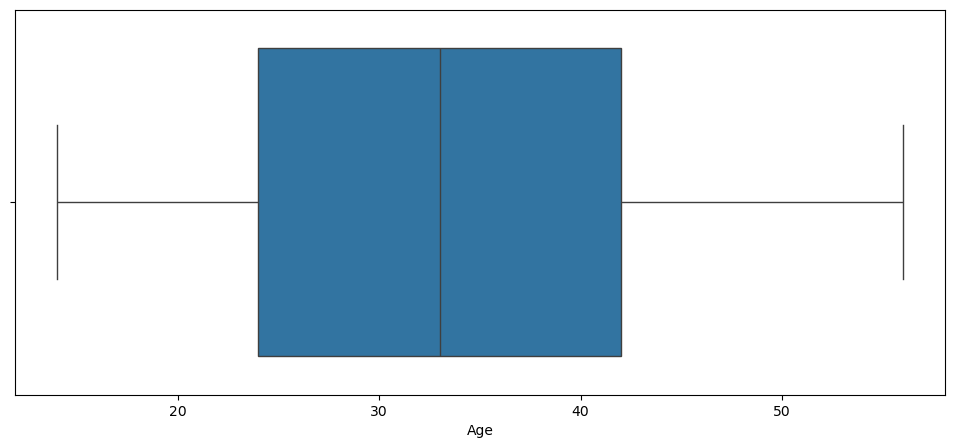

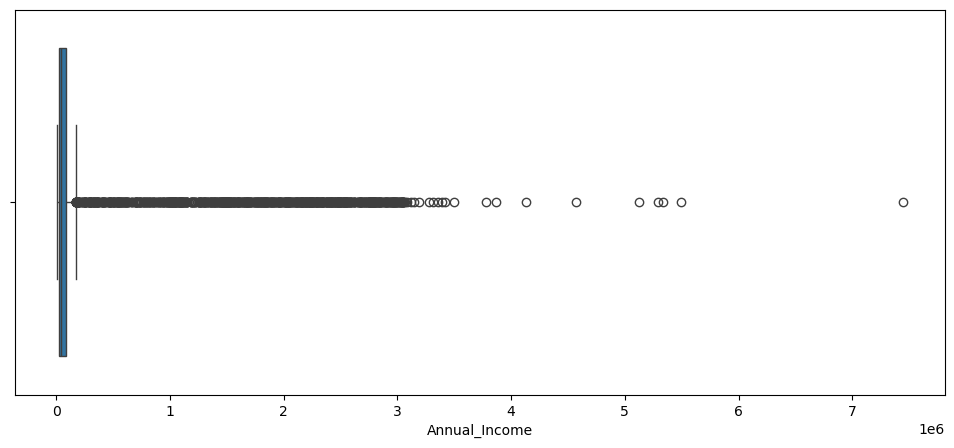

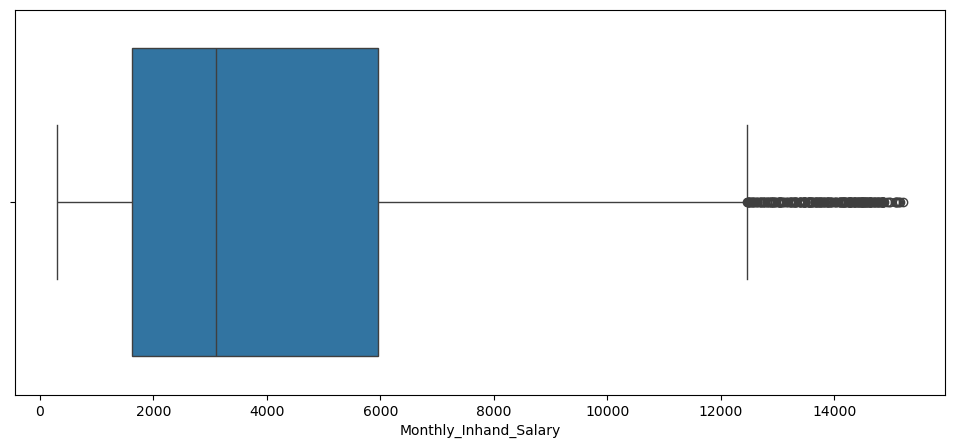

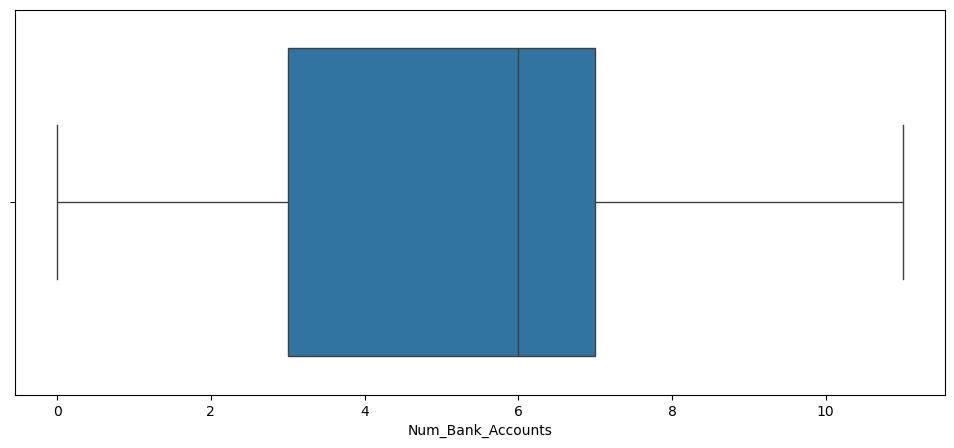

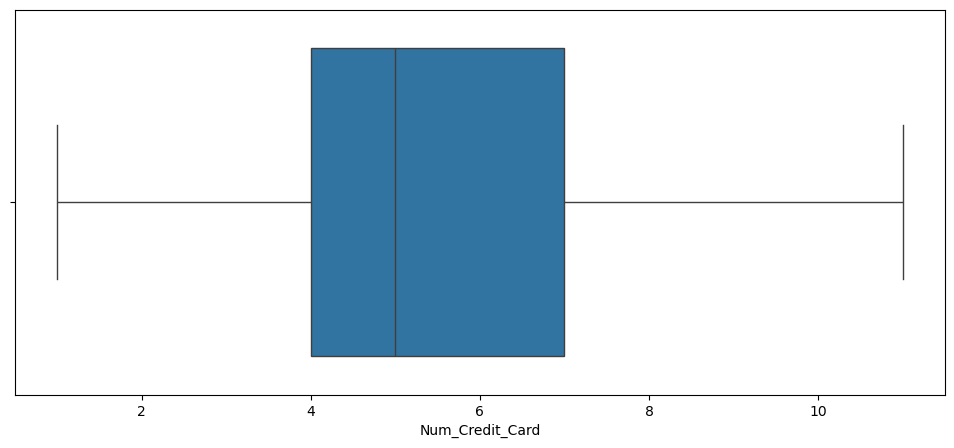

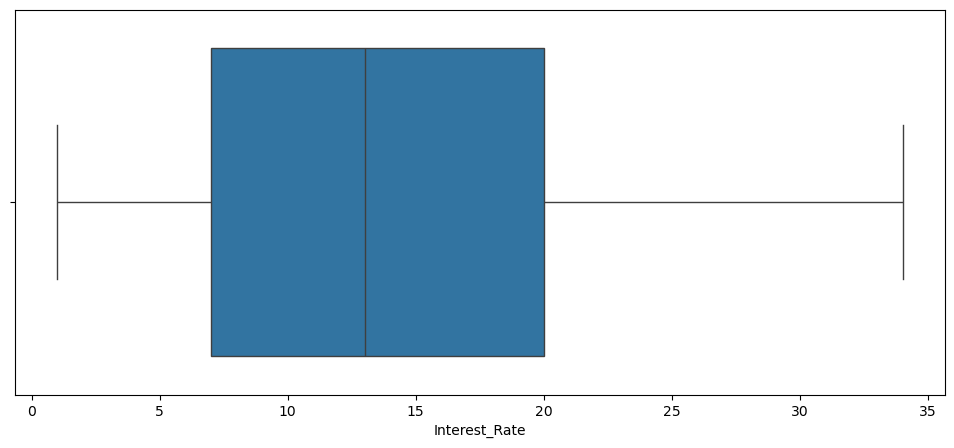

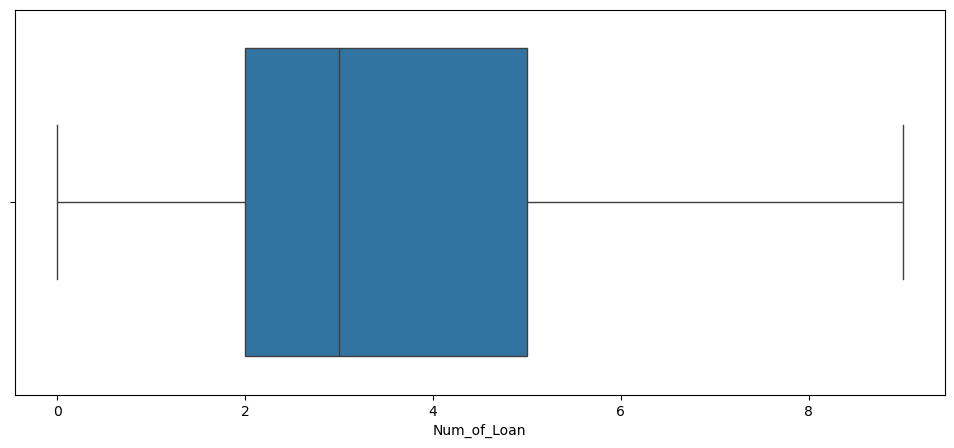

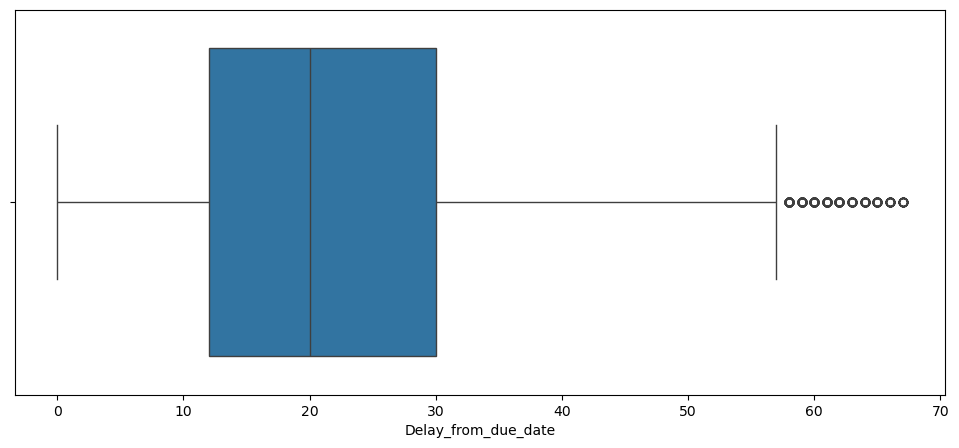

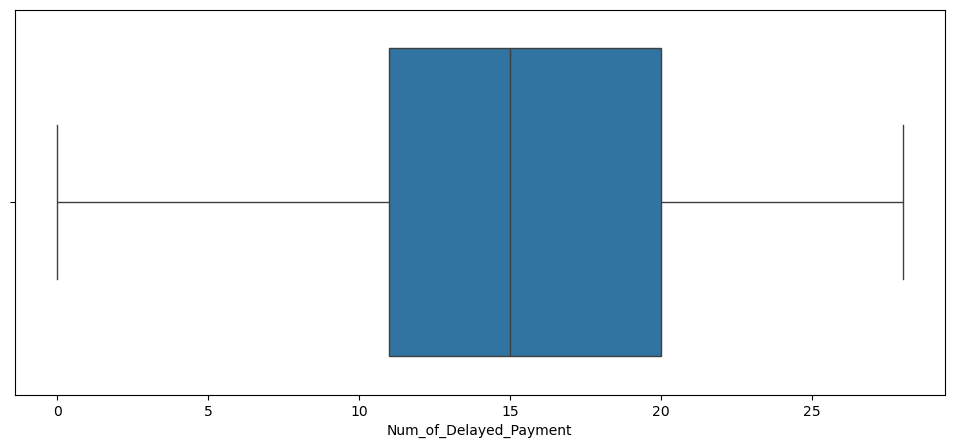

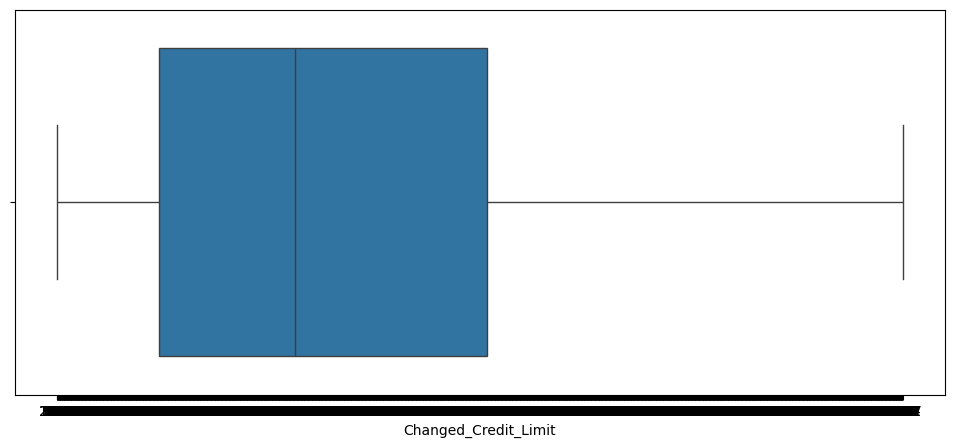

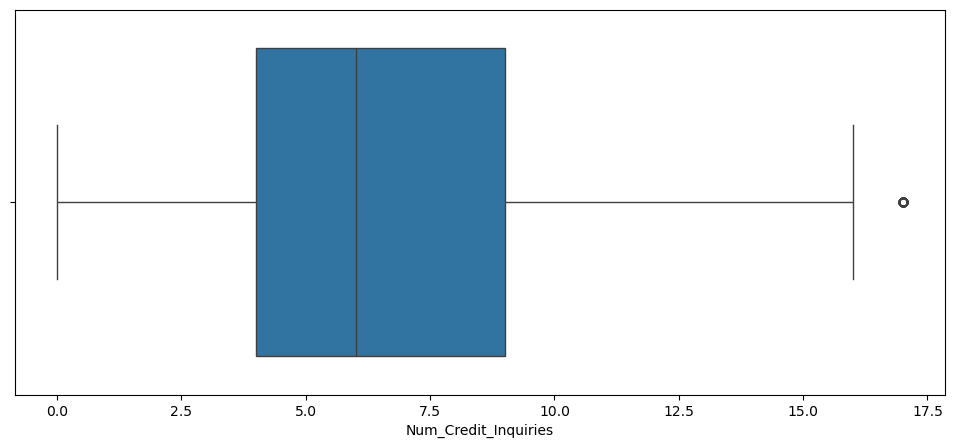

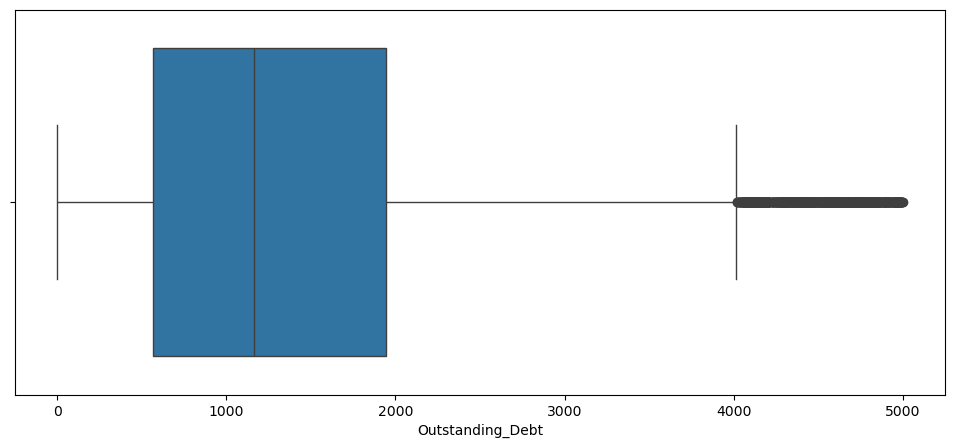

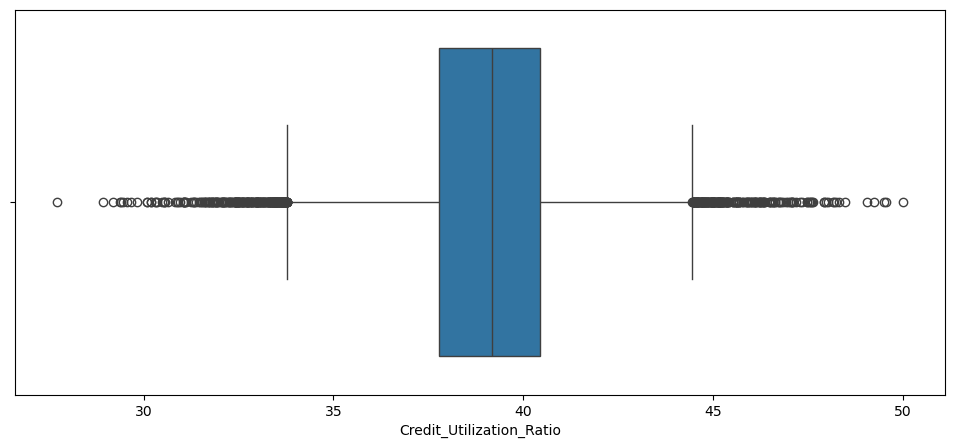

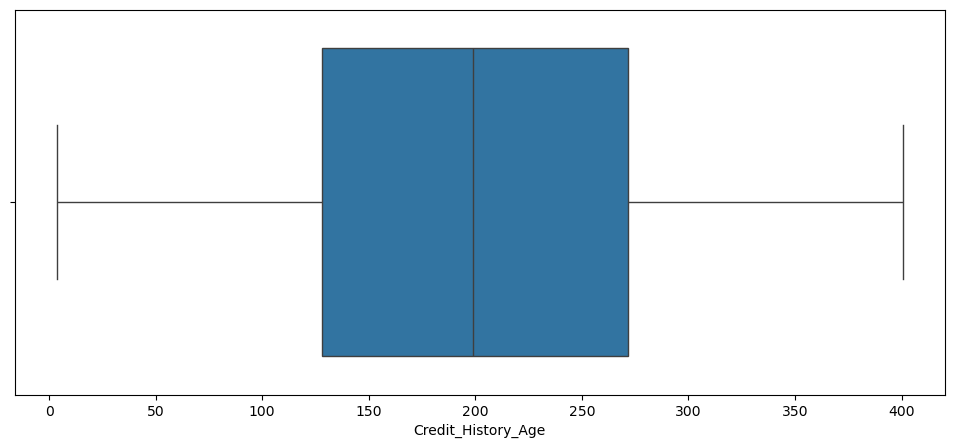

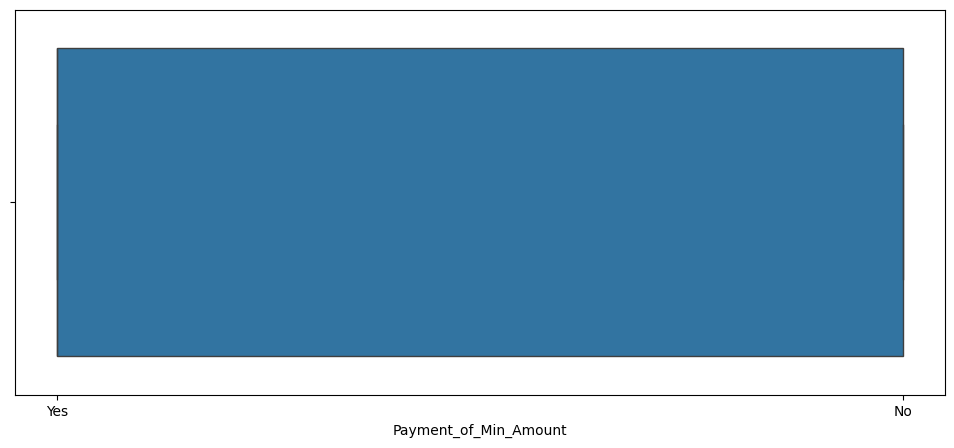

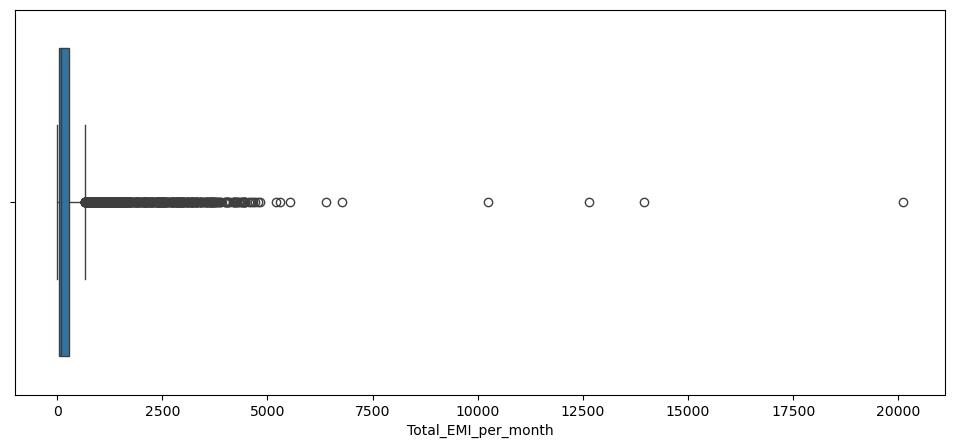

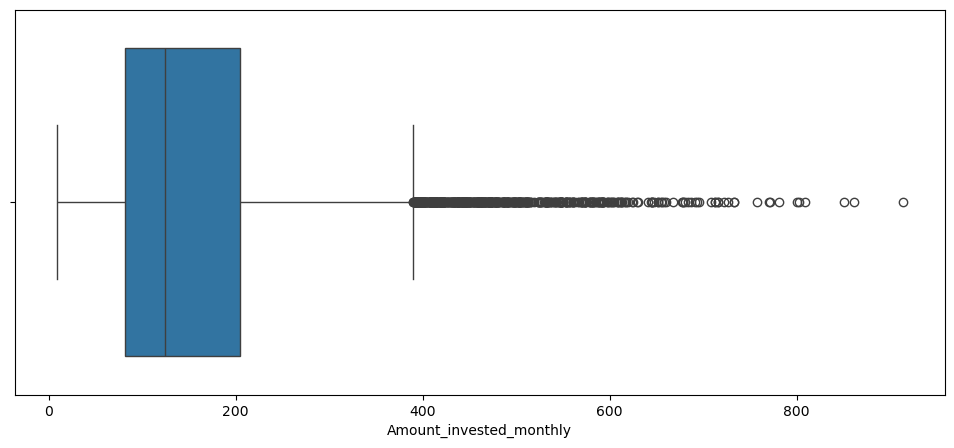

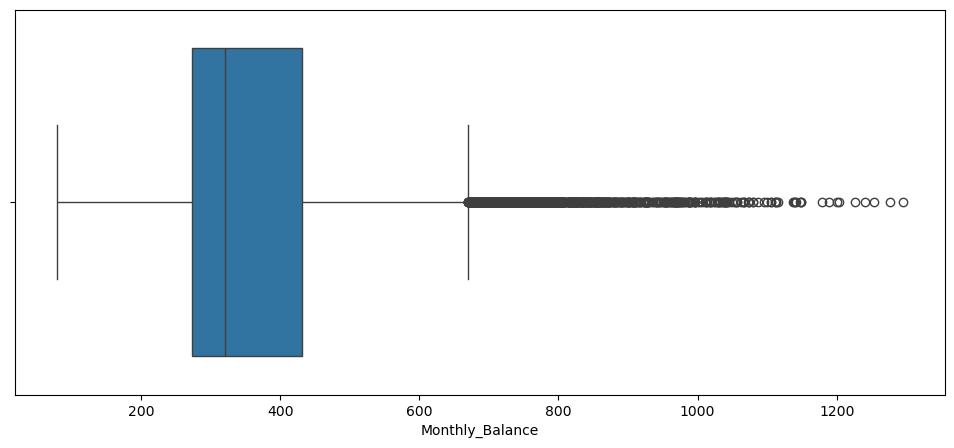

In [101]:
# Boxplot of all numeric columns
for i in col:
    plt.figure(figsize=[12,5])
    sns.boxplot(data=num_data,  x= i)
    plt.show()

* Annual Income, Momthly Inhand Salary, Delay from due date, Outstanding Debt, Credit Utilization ratio, Total EMI per month, Annual Invested month/Annualy, Monthly balance has Outliers.
* But in this case someone portion can have very high salary and their annual invesment can also be very high.
* Hence we cannot remove those point as it is real and correct.

In [102]:
col2 = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
        'Changed_Credit_Limit','Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

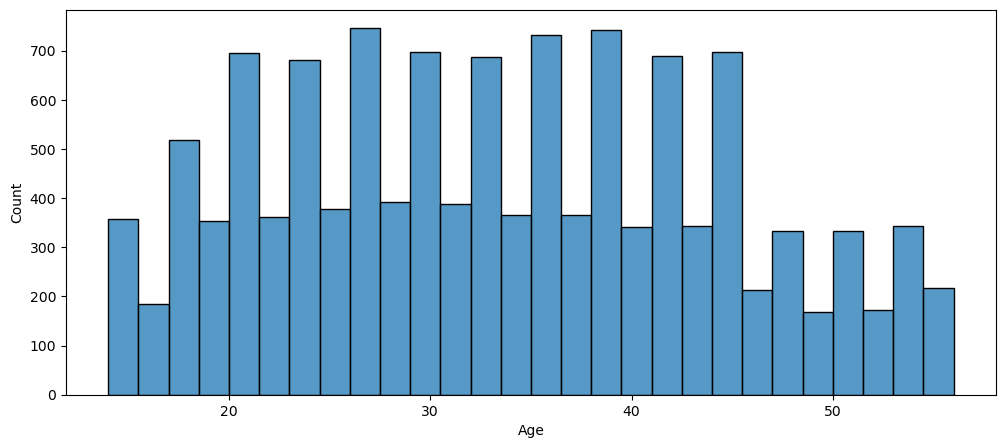

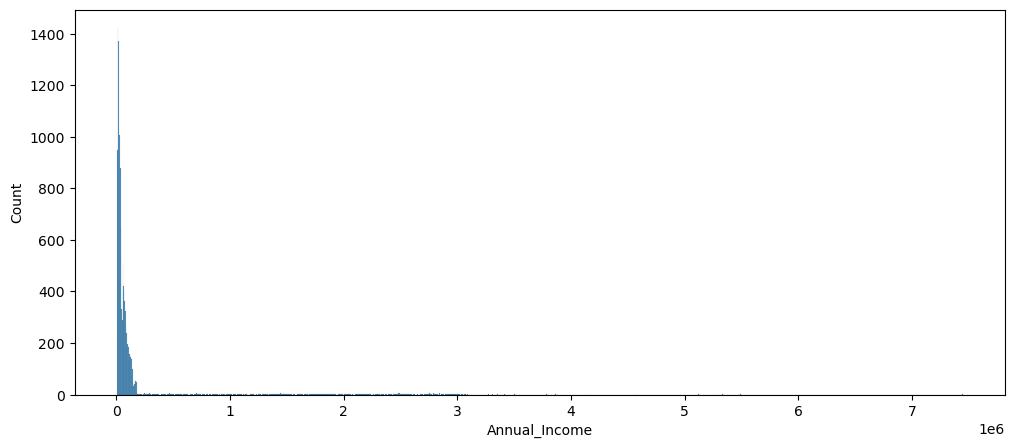

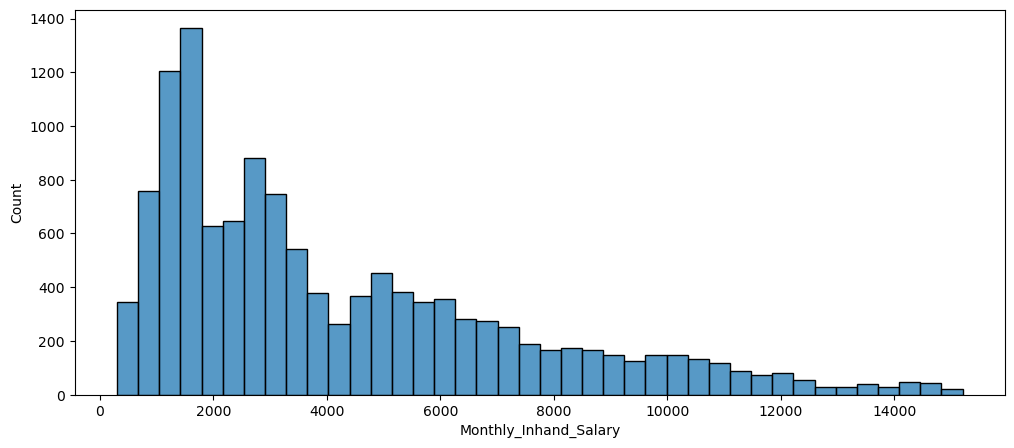

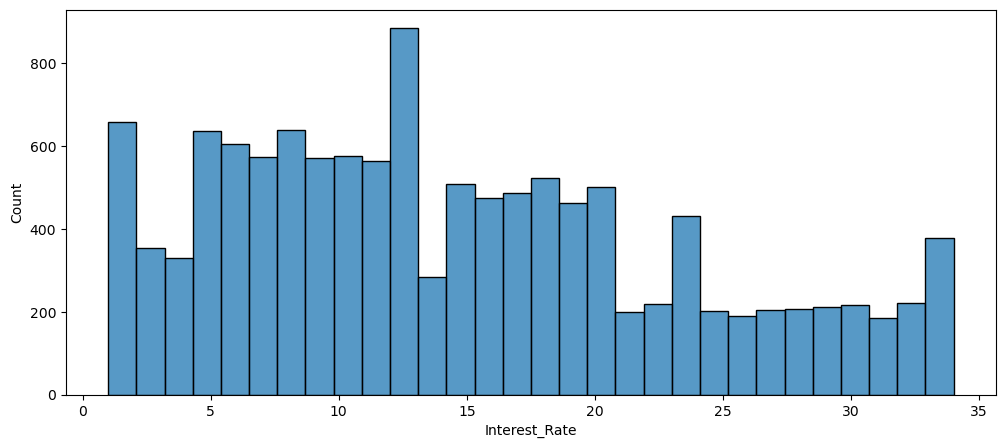

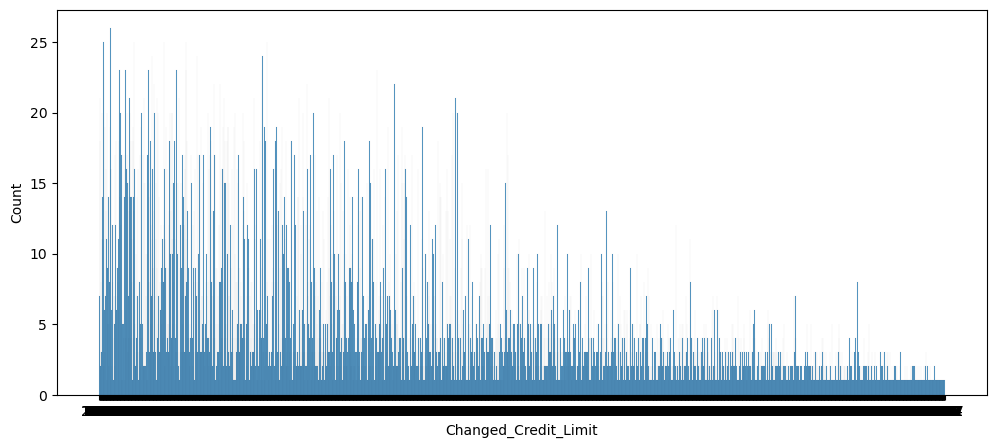

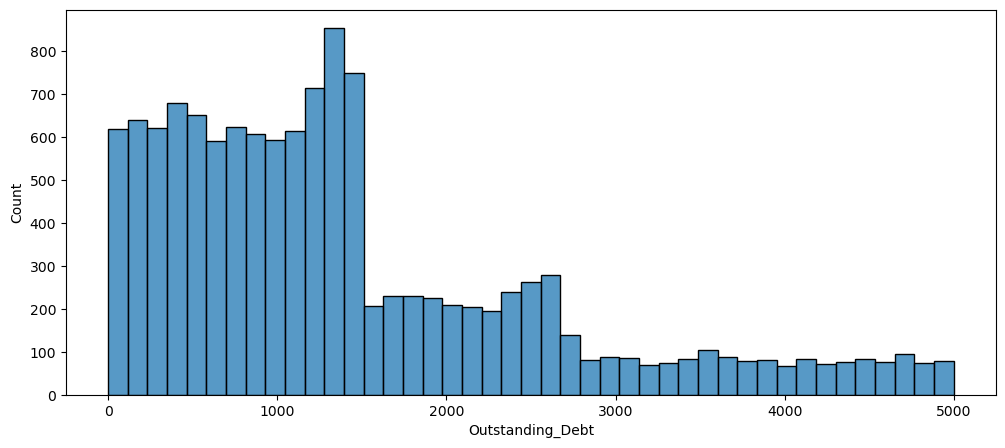

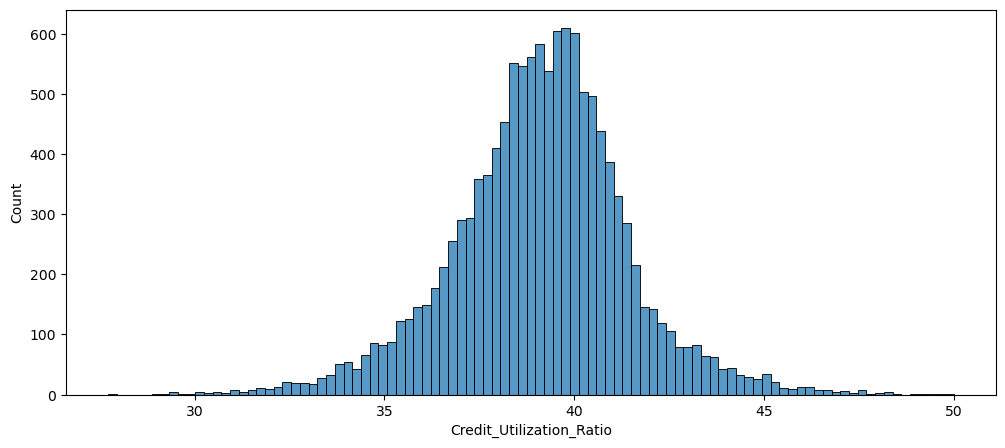

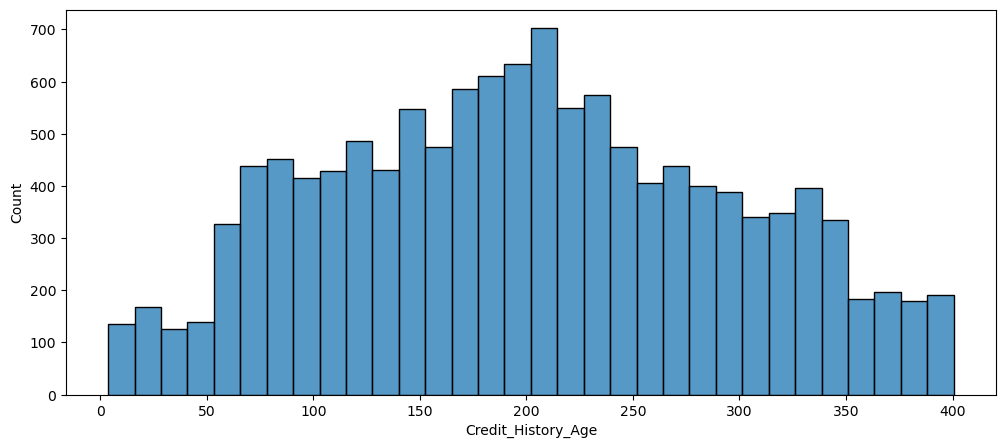

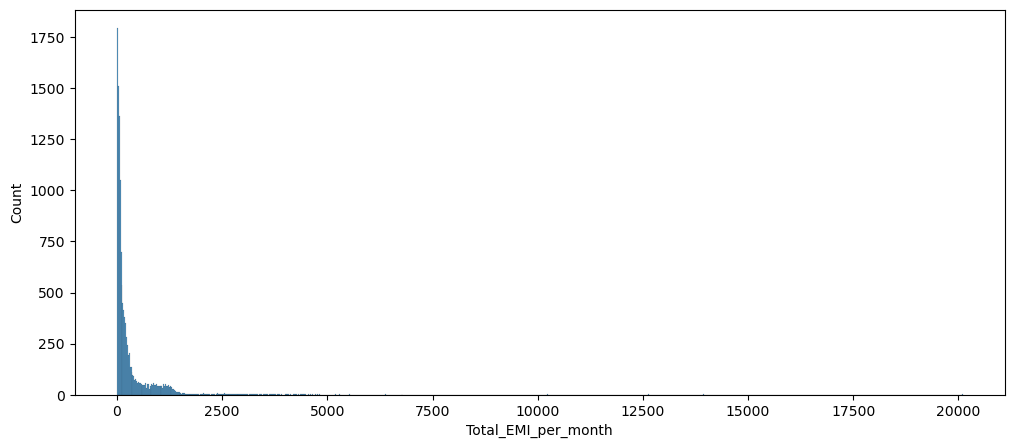

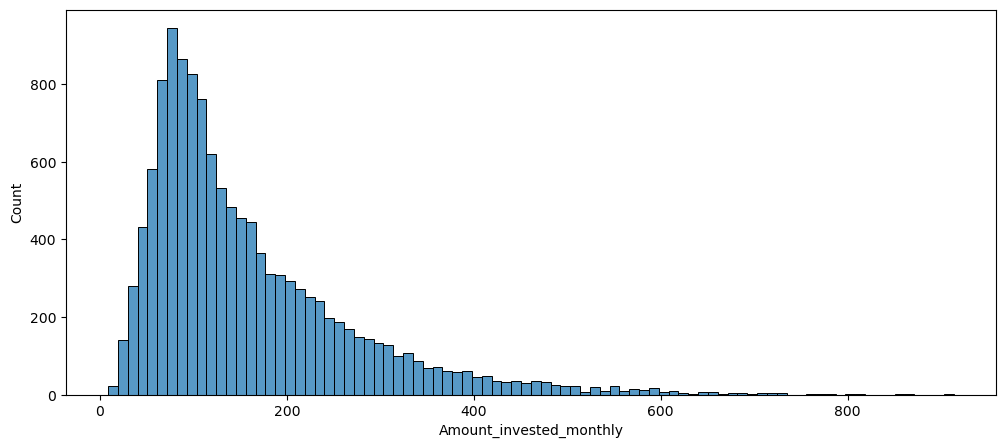

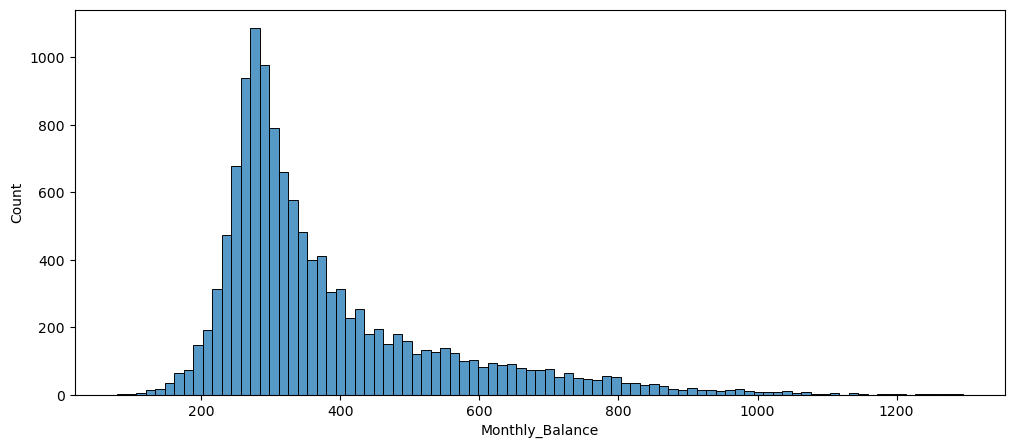

In [103]:
# Histogram plot of all nnumeric columns to check distribution. 
for i in col2:
    plt.figure(figsize=[12,5])
    sns.histplot(data=num_data,  x= i)
    plt.show()

In [104]:
# lets see what is the percentage of people have no loan at all
(len(num_data[num_data['Num_of_Loan']==0])/len(num_data))*100

11.408

In [105]:
# lets see the distribution of the types of loan.

In [106]:
loan_type_df = cleaned_data[cleaned_data['Month']=='January']

In [107]:
# Percentage of each type of loan
loan_type_df['Type_of_Loan'].value_counts(normalize=True).reset_index()

,Type_of_Loan,proportion
0,Payday Loan,0.108926
1,Credit-Builder Loan,0.108189
2,Not Specified,0.108026
3,Home Equity Loan,0.107071
4,Mortgage Loan,0.106934
5,Personal Loan,0.106061
6,Student Loan,0.105843
7,Debt Consolidation Loan,0.105843
8,Auto Loan,0.104206
9,No_Loan,0.038900


In [108]:
loan = loan_type_df['Type_of_Loan'].value_counts().reset_index()

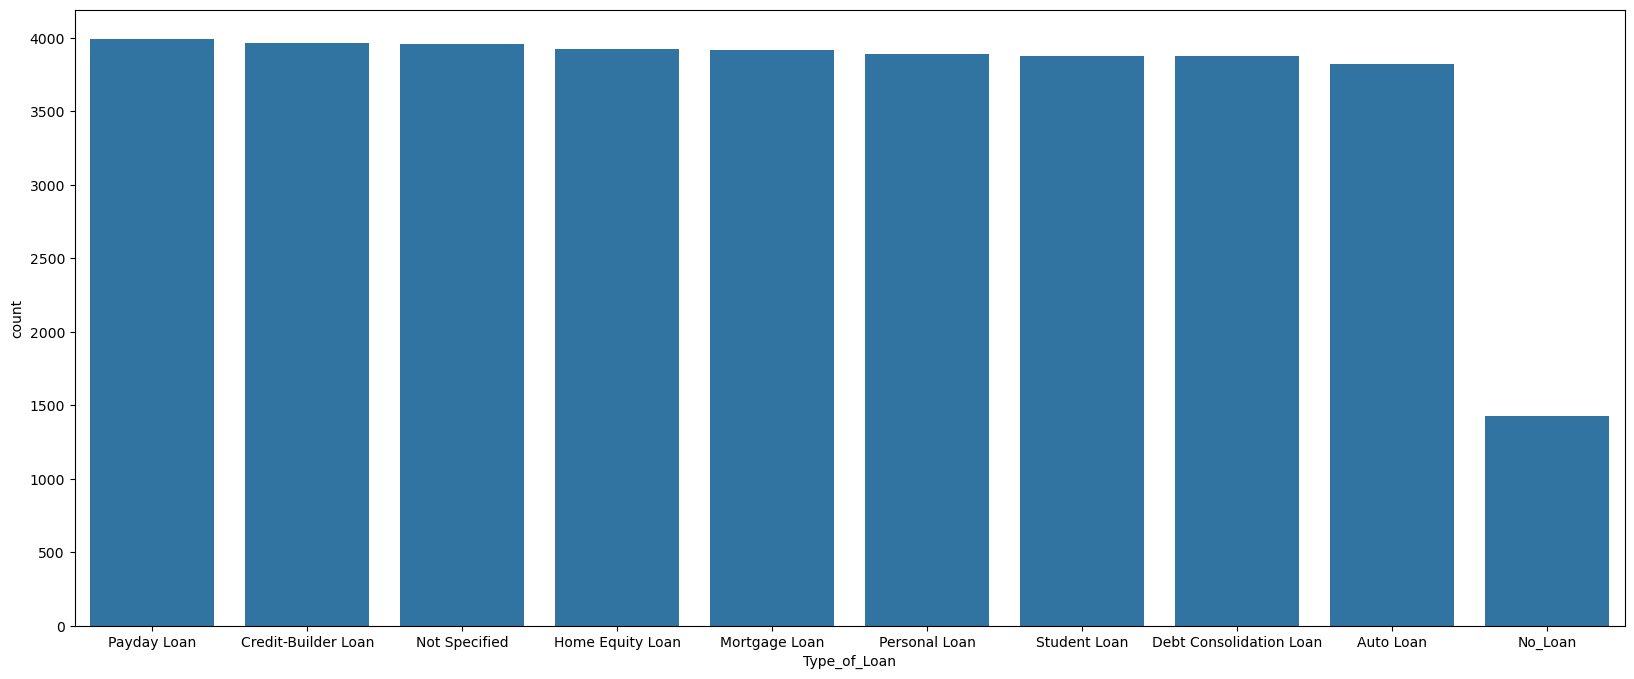

In [109]:
plt.figure(figsize=[20,8])
sns.barplot(data=loan, x='Type_of_Loan', y='count')
plt.show()

In [110]:
loan['Type_of_Loan'].unique()

array(['Payday Loan', 'Credit-Builder Loan', 'Not Specified',
       'Home Equity Loan', 'Mortgage Loan', 'Personal Loan',
       'Student Loan', 'Debt Consolidation Loan', 'Auto Loan', 'No_Loan'],
      dtype=object)

In [111]:
def security_type(x):
    secured = ['Home Equity Loan','Mortgage Loan','Auto Loan']
    unsecured = ['Payday Loan','Credit-Builder Loan','Personal Loan','Student Loan','Debt Consolidation Loan']
    if x in secured:
        return 'Secured'
    elif x == 'No_Loan':
        return 'No_Loan'
    else:
        return 'Unsecured'

In [112]:
 loan_type_df['Security_Type'] =  loan_type_df['Type_of_Loan'].apply(security_type)

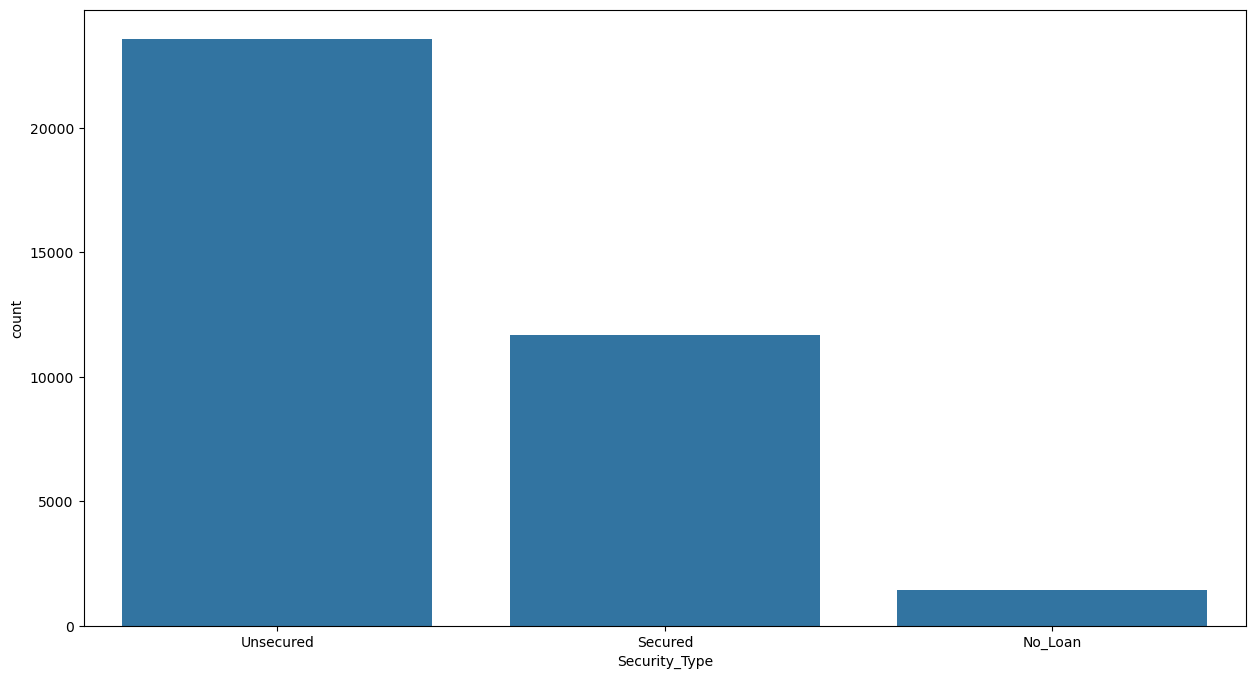

In [113]:
plt.figure(figsize=[15,8])
sns.countplot(data=loan_type_df, x='Security_Type')
plt.show()

In [114]:
loan_type_df['Security_Type'].value_counts(normalize=True)*100

Security_Type
Unsecured    64.288832
Secured      31.821158
No_Loan       3.890010
Name: proportion, dtype: float64

In [115]:
Payment_Behaviour_df = cleaned_data.groupby(['Customer_ID','Month']).agg({'Payment_Behaviour':'first'}).reset_index()

In [116]:
Payment_Behaviour_df[Payment_Behaviour_df['Customer_ID']=='CUS_0x1000']

,Customer_ID,Month,Payment_Behaviour
0,CUS_0x1000,April,Not_Available
1,CUS_0x1000,August,High_spent_Medium_value_payments
2,CUS_0x1000,February,High_spent_Small_value_payments
3,CUS_0x1000,January,Low_spent_Large_value_payments
4,CUS_0x1000,July,Low_spent_Small_value_payments
5,CUS_0x1000,June,High_spent_Small_value_payments
6,CUS_0x1000,March,High_spent_Medium_value_payments
7,CUS_0x1000,May,Low_spent_Large_value_payments


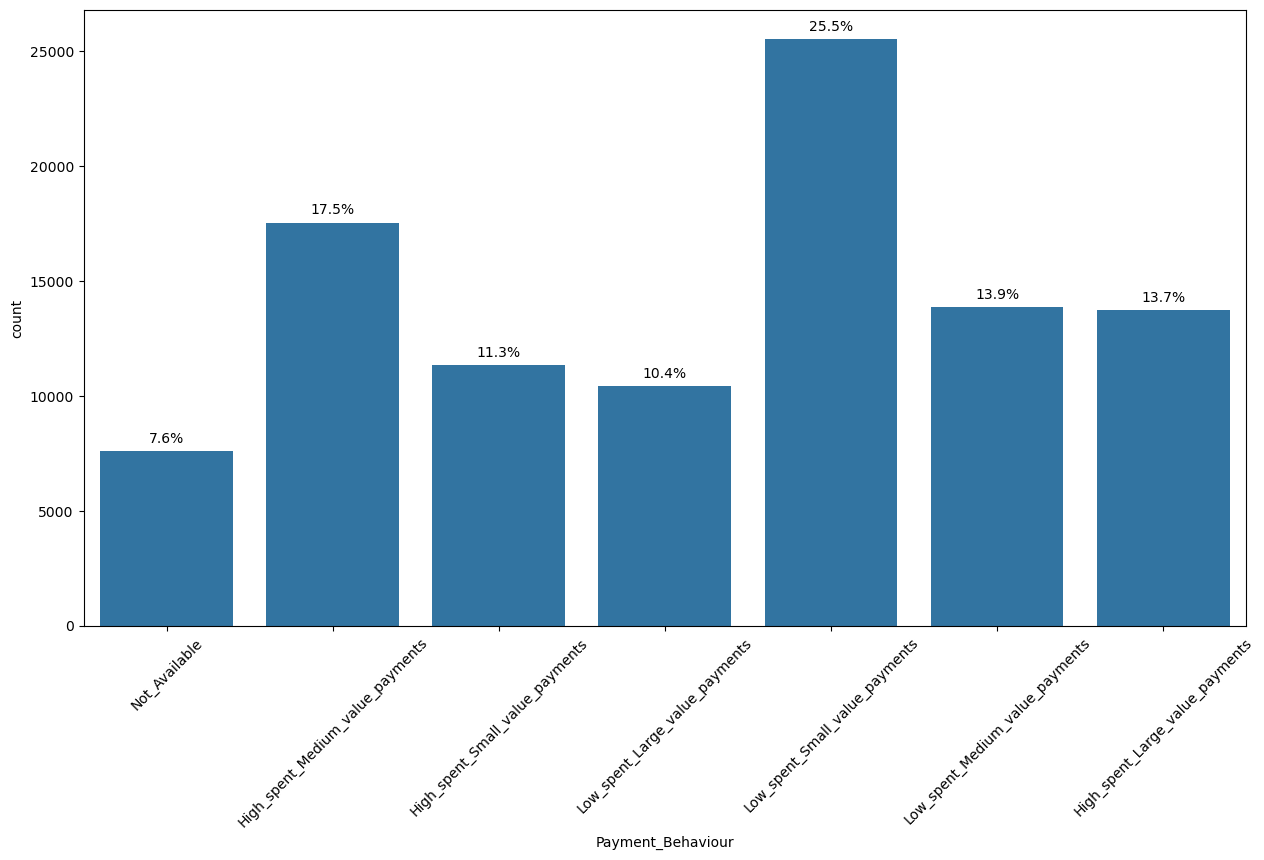

In [117]:
plt.figure(figsize=[15,8])

ax = sns.countplot(data=Payment_Behaviour_df, x='Payment_Behaviour')
plt.xticks(rotation=45)
total = len(Payment_Behaviour_df)

for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100*count/total)
    ax.annotate(percentage,
               (p.get_x() + p.get_width() / 2.,count),
                ha = 'center',va = 'center',
                xytext = (0,9),
                textcoords = 'offset points')
plt.show()

In [118]:
cleaned_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Type_of_Loan'],
      dtype='object')

In [119]:
occupation = cleaned_data.groupby('Customer_ID').agg({'Occupation':'first'})

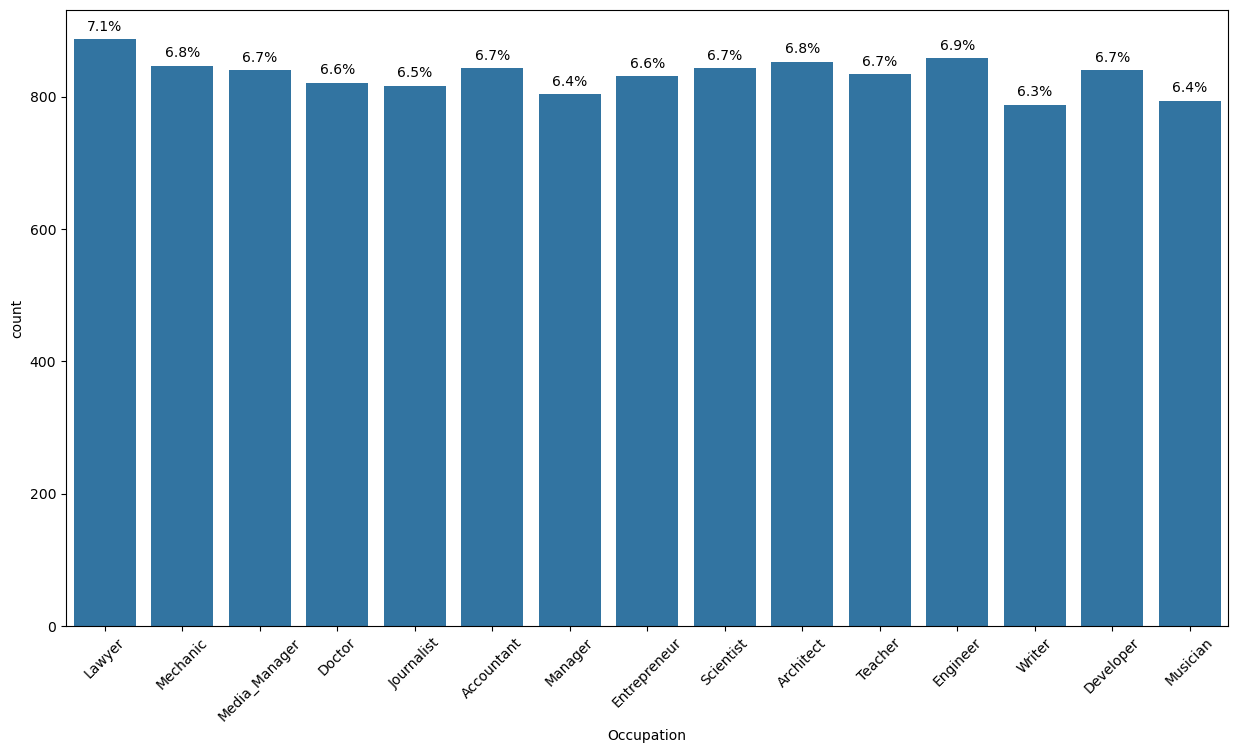

In [120]:
plt.figure(figsize=[15,8])

ax = sns.countplot(data=occupation, x='Occupation')
plt.xticks(rotation=45)

total = len(occupation)

for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100*count/total)
    ax.annotate(percentage,
                 (p.get_x() + p.get_width() / 2.,count),
                  ha = 'center' , va = 'center',
                  xytext = (0,9),
                  textcoords = 'offset points')
                 
plt.show()

In [121]:
credit_mix = cleaned_data.groupby('Customer_ID').agg({'Credit_Mix':'first'})

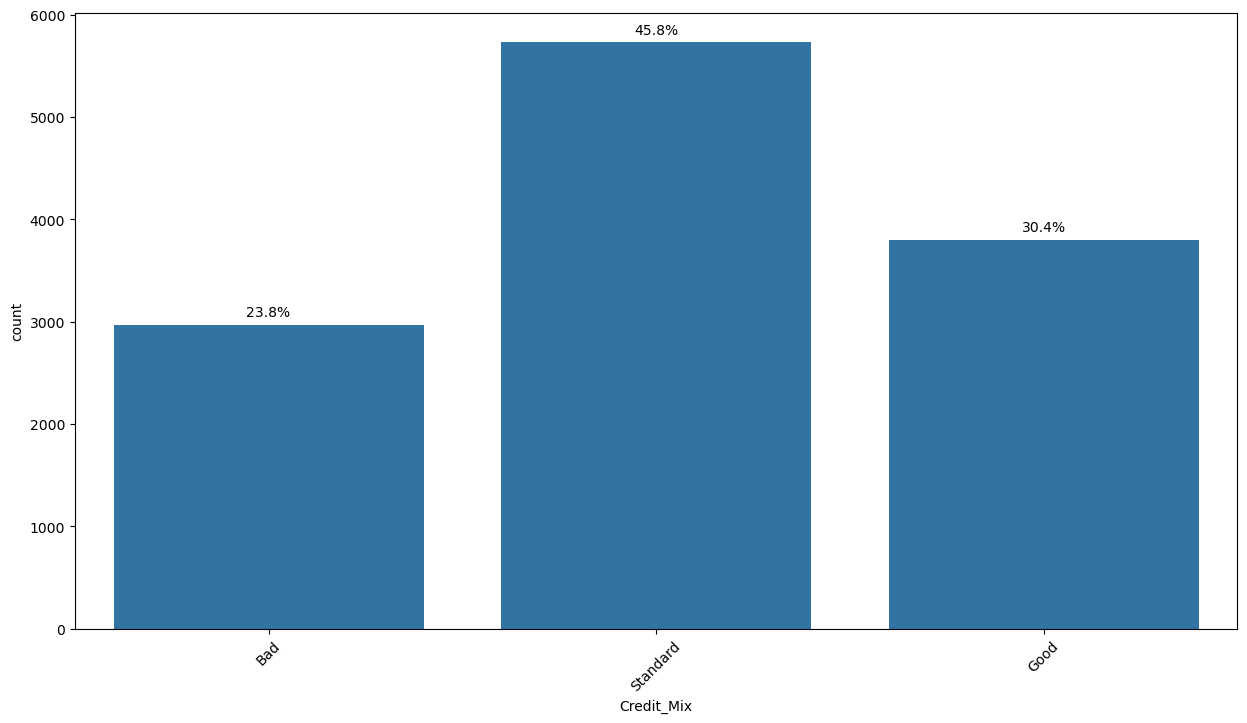

In [122]:
plt.figure(figsize=[15,8])

ax = sns.countplot(data=credit_mix, x='Credit_Mix')
plt.xticks(rotation=45)

total = len(credit_mix)

for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100*count/total)
    ax.annotate(percentage,
               (p.get_x() + p.get_width() / 2.,count),
                ha = 'center' , va = 'center',
                xytext = (0,9),
                textcoords = 'offset points')

### Bivariate Visulization

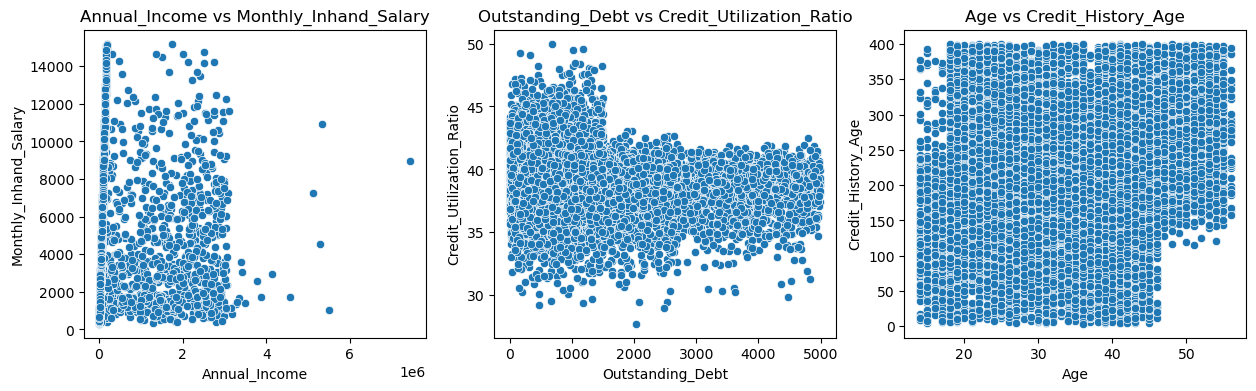

In [123]:
plt.figure(figsize=[15,4])
plt.subplot(1,3,1)
sns.scatterplot(data=num_data, x='Annual_Income',y='Monthly_Inhand_Salary')
plt.title('Annual_Income vs Monthly_Inhand_Salary')

plt.subplot(1,3,2)
sns.scatterplot(data=num_data, x='Outstanding_Debt',y='Credit_Utilization_Ratio')
plt.title('Outstanding_Debt vs Credit_Utilization_Ratio')

plt.subplot(1,3,3)
sns.scatterplot(data=num_data, x='Age',y='Credit_History_Age')
plt.title('Age vs Credit_History_Age')

plt.show()

In [124]:
df8 = cleaned_data.groupby('Customer_ID').agg({'Occupation':'first','Annual_Income':'max','Type_of_Loan':'first','Outstanding_Debt':'max'})

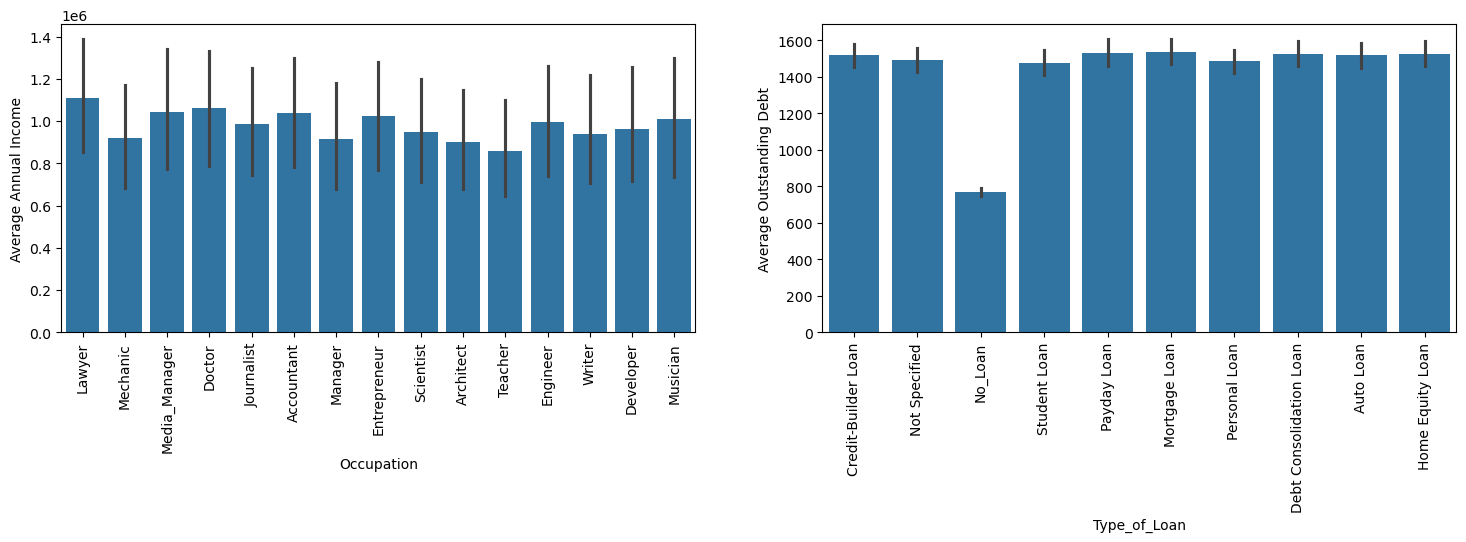

In [125]:
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
sns.barplot(data=df8, x='Occupation', y='Annual_Income', estimator=np.mean)
plt.ylabel('Average Annual Income')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df8, x='Type_of_Loan', y='Outstanding_Debt', estimator=np.mean)
plt.ylabel('Average Outstanding Debt')
plt.xticks(rotation=90)

plt.show()

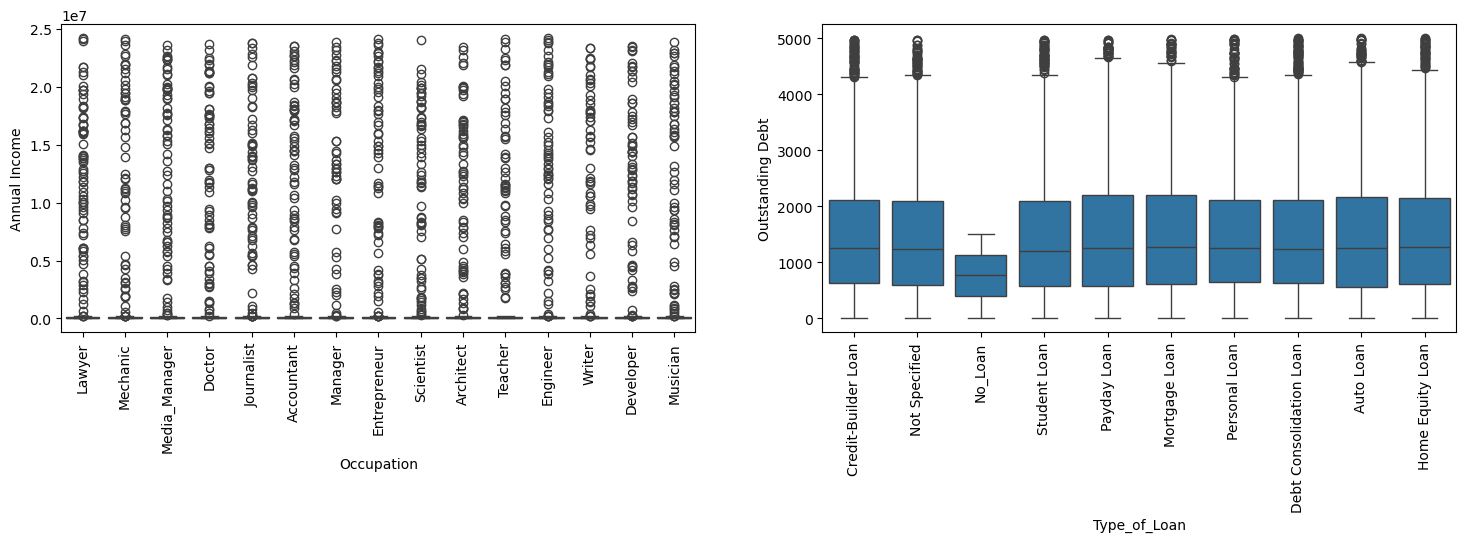

In [126]:
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
sns.boxplot(data=df8, x='Occupation', y='Annual_Income')
plt.ylabel('Annual Income')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=df8, x='Type_of_Loan', y='Outstanding_Debt')
plt.ylabel('Outstanding Debt')
plt.xticks(rotation=90)

plt.show()

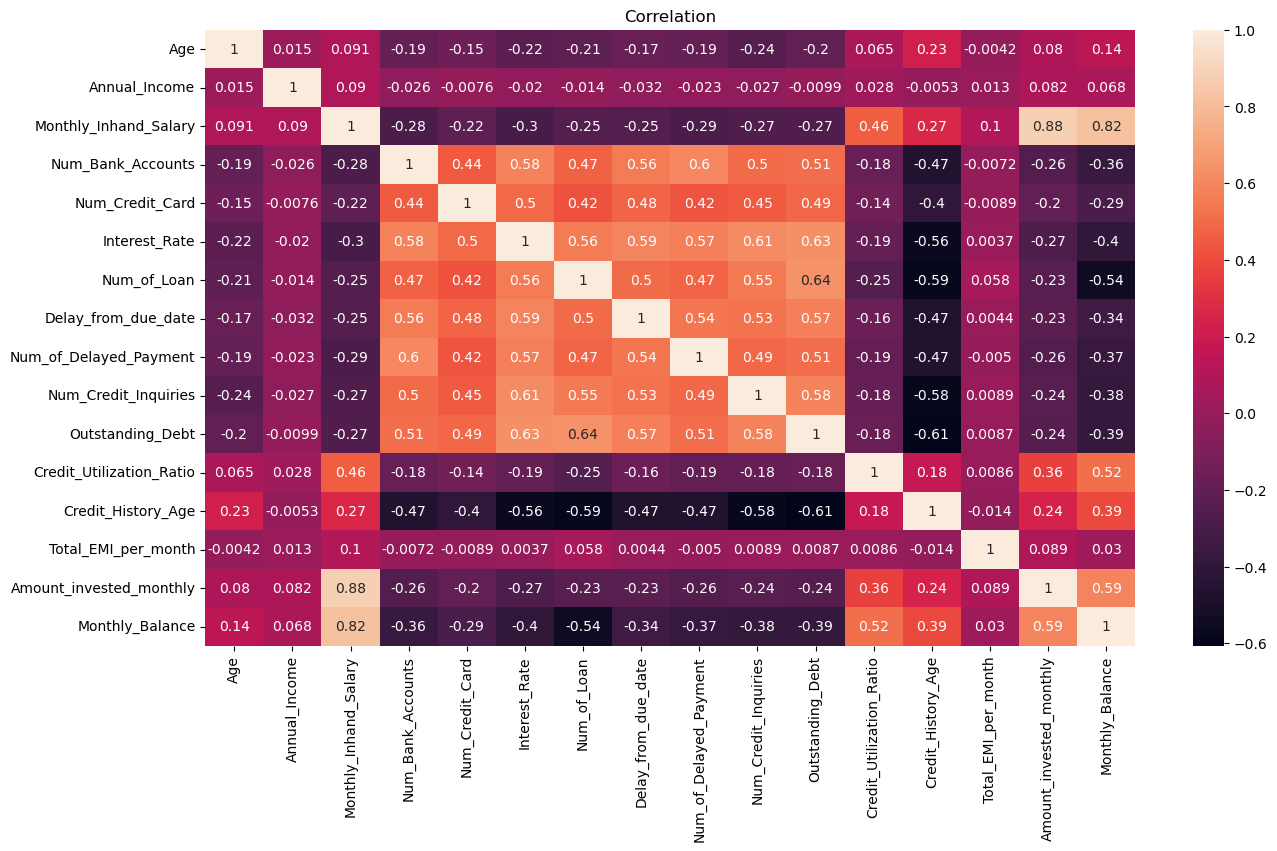

In [127]:
num_df = num_data.select_dtypes(include=[np.number])

plt.figure(figsize=[15,8])
sns.heatmap(num_df.corr(), annot=True)
plt.title('Correlation')
plt.show()

### Multivariate Visulization 

In [128]:
pair = num_data[['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age']]

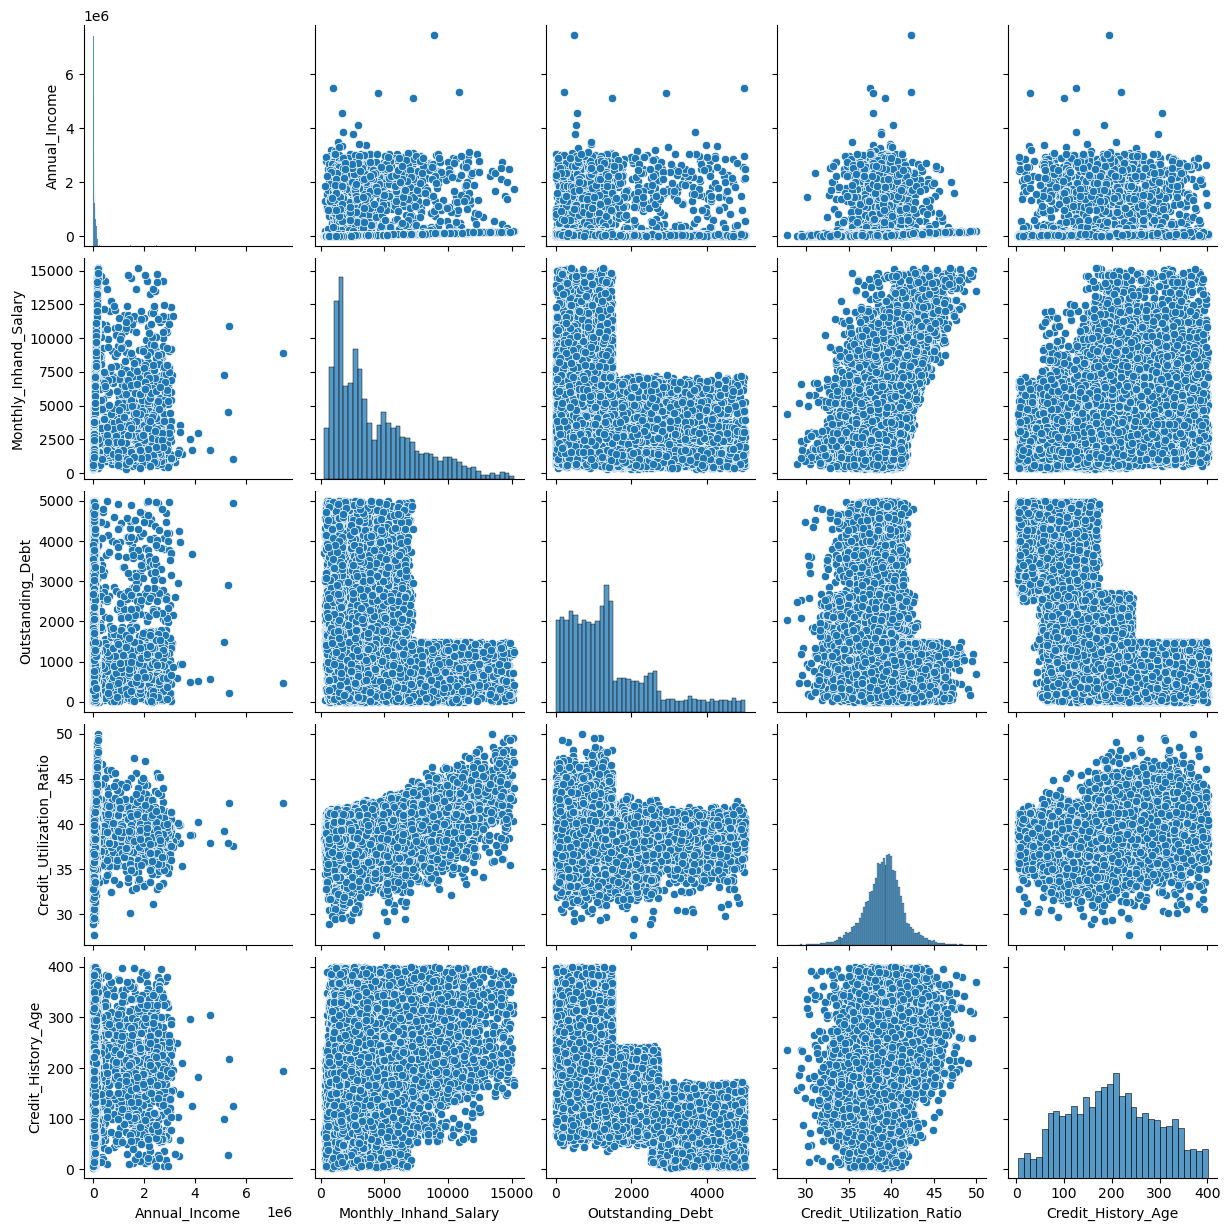

In [129]:
sns.pairplot(pair)

## Customize Credit score

### Credit Score=0.35×Payment History Score+0.25×Debt-to Income Ratio Score+0.20×Credit Utilization Score+0.10× Length of Credit History Score+0.10×Credit Mix Score

#### Payment History Score= (Number of On-Time Payments/Total Payments) * 100

#### Debt-to-Income Ratio Score = (1 - (Total Monthly Debt Payments/Monthly Gross Income))* 100

#### Credit Utilization Score = (1 -(Total Credit Used/Total Credit Limit))*100

#### Length of Credit History Score = (Average Age of All Credit Accounts/Maximum Possible Credit Age) * 100

#### Credit Mix Score = (Number of Credit Types Used/Total Possible Credit Types) * 100

In [130]:
cleaned_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [131]:
# converting credit history age from months to years.
df7['Credit_History_Age'] = df7['Credit_History_Age']/12 

In [146]:
df_credit_score = copy.deepcopy(df7)

In [149]:
month_to_num = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df_credit_score['Month_num'] = df_credit_score['Month'].map(month_to_num)

In [163]:
# Credit score calculated for each customer is considering the whole duration from start to end. 
# We have taken mean of all numeric col and mode of the categorical col.

In [154]:
df_credit_cal = df_credit_score.groupby('Customer_ID').agg({'Annual_Income':'mean',
                                                    'Monthly_Inhand_Salary':'mean',
                                                    'Num_of_Delayed_Payment':'mean',
                                                    'Num_Credit_Inquiries':'mean',
                                                    'Outstanding_Debt':'mean',
                                                    'Credit_Utilization_Ratio':'mean',
                                                    'Credit_History_Age':'mean',
                                                    'Credit_Mix':lambda x: x.mode()[0]})

In [155]:
df_credit_cal.head()

,Annual_Income,Monthly_Inhand_Salary,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Mix
Customer_ID,,,,,,,,
CUS_0x1000,30625.0,2706.161667,25.000,10.875,1562.91,33.477546,10.458333,Bad
CUS_0x1009,52312.0,4250.390000,17.875,3.000,202.68,29.839984,26.875000,Standard
CUS_0x100b,113781.0,9549.782500,7.375,1.750,1030.20,34.841449,13.625000,Good
CUS_0x1011,58918.0,5208.872500,14.375,7.000,473.14,27.655897,15.541667,Standard
CUS_0x1013,98620.0,7962.415000,8.500,3.000,1233.51,31.933940,15.343750,Good


In [156]:
def custom_credit_score(row):
    # Define weights for each component
    weights = {
        'Payment_History_Score': 0.25,
        'Credit_Utilization_Score': 0.20,
        'Length_of_Credit_History_Score': 0.15,
        'Total_Debt_Score': 0.15,
        'New_Credit_Score': 0.10,
        'Credit_Mix_Score': 0.10,
        'Income_Stability_Score': 0.05
    }

    # Calculate Payment History Score
    payment_history_score = max(0, 100 - 5 * row['Num_of_Delayed_Payment'])  # deduct 5 points for each delayed payment

    # Calculate Credit Utilization Score
    credit_utilization_score = max(0, 100 - 2 * row['Credit_Utilization_Ratio'])  # Deduct 2 points for higher utilization

    # Calculate Length of Credit History Score
    length_of_credit_history_score = min(100, row['Credit_History_Age'] * 10)  # Scale by age of credit history

    # Calculate Total Debt Score
    total_debt_score = max(0, 100 - row['Outstanding_Debt'] / row['Annual_Income'] * 100)  # Deduct points based on debt-to-income ratio

    # Calculate New Credit Score
    new_credit_score = max(0, 100 - 10 * row['Num_Credit_Inquiries'])  # Deduct points for each new inquiry

    # Calculate Credit Mix Score
    credit_mix_score = 100 if row['Credit_Mix'] == 'Good' else 50  # Simple binary score based on credit mix

    # Calculate Income Stability Score
    income_stability_score = 100 if row['Monthly_Inhand_Salary'] >= 0.8 * (row['Annual_Income'] / 12) else 50  # Compare in-hand salary to expected monthly salary

    # Aggregate the scores based on weights
    credit_score = (
        weights['Payment_History_Score'] * payment_history_score +
        weights['Credit_Utilization_Score'] * credit_utilization_score +
        weights['Length_of_Credit_History_Score'] * length_of_credit_history_score +
        weights['Total_Debt_Score'] * total_debt_score +
        weights['New_Credit_Score'] * new_credit_score +
        weights['Credit_Mix_Score'] * credit_mix_score +
        weights['Income_Stability_Score'] * income_stability_score
    )

    return credit_score

# Apply the function to each row of your DataFrame
df_credit_cal['Credit_Score'] = df_credit_cal.apply(custom_credit_score, axis=1)


In [157]:
df_credit_cal['Credit_Score'].min()

22.558408103711063

In [158]:
df_credit_cal['Credit_Score'].max()

87.71770057763558

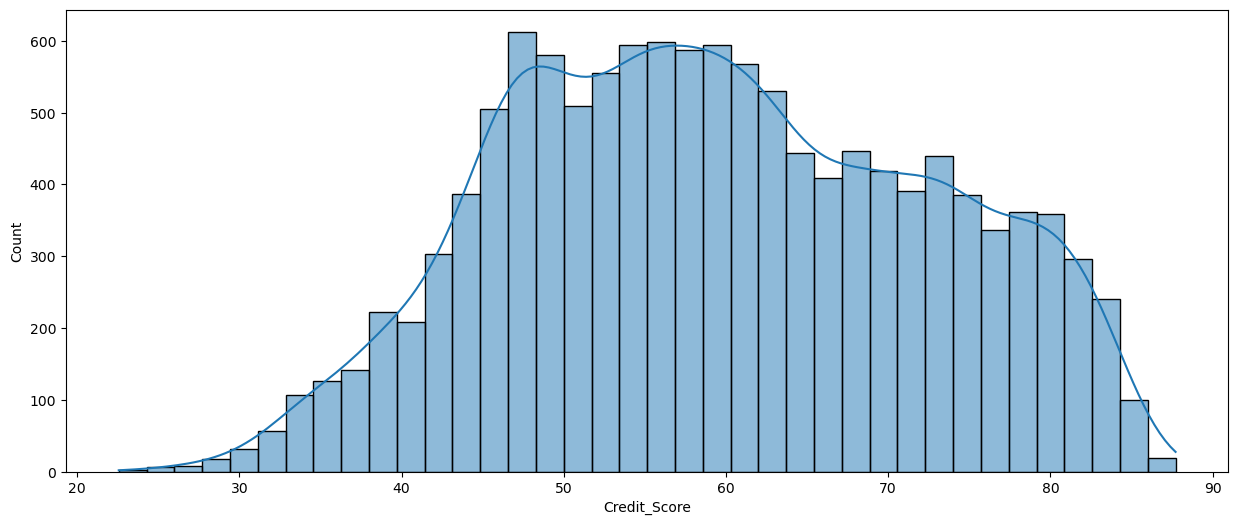

In [159]:
plt.figure(figsize=[15,6])
sns.histplot(data=df_credit_cal, x='Credit_Score', kde=True)
plt.show()

In [ ]:
# poor, avearge, fair, good, excelllent are the diff categories in credit score.
# Lets create a bin for this groups.

In [177]:
bins = [0,42,62,76,85,100]
labels = ['Poor','Average','Fair', 'Good', 'Excellent']
df_credit_cal['Credit_score_type'] = pd.cut(df_credit_cal['Credit_Score'], bins=bins, labels=labels)

In [178]:
df_credit_cal['Credit_score_type'].value_counts().reset_index()

,Credit_score_type,count
0,Average,6289
1,Fair,3514
2,Good,1602
3,Poor,1035
4,Excellent,60


In [180]:
df9 = df_credit_cal['Credit_score_type'].value_counts().reset_index()

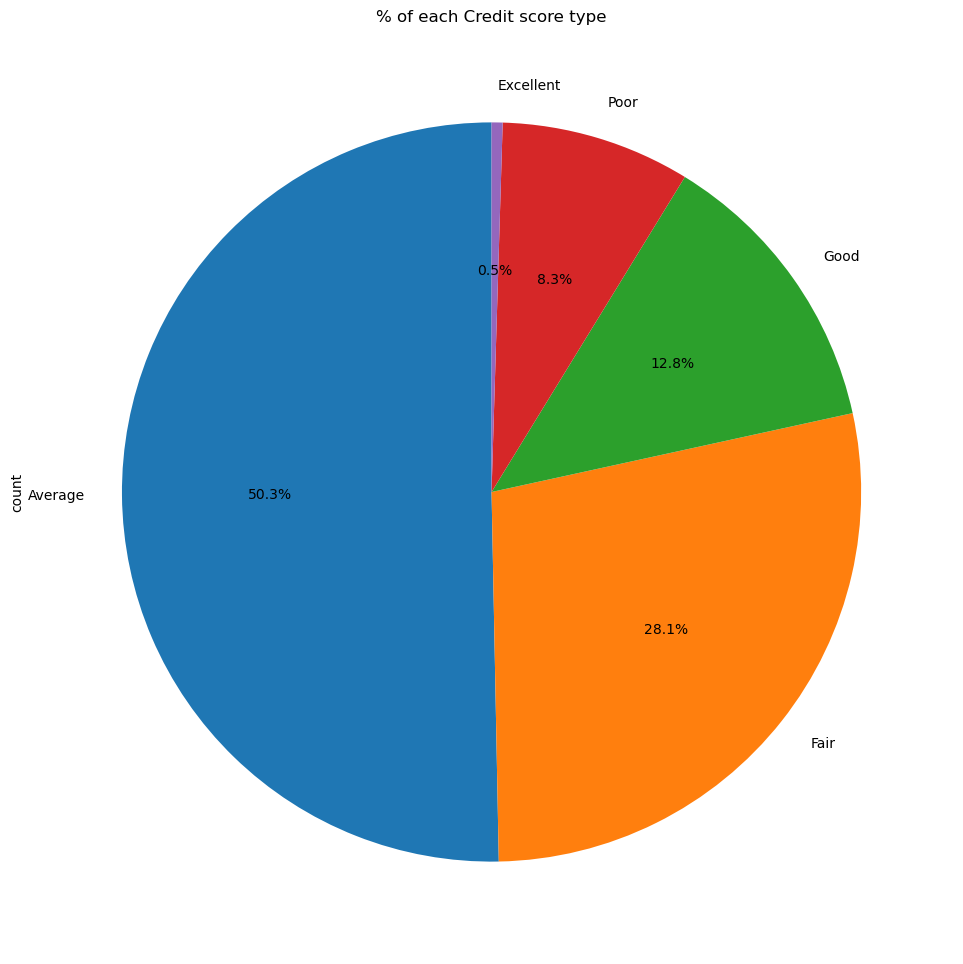

In [201]:
df9.set_index('Credit_score_type')['count'].plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(12,12),
    title='% of each Credit score type')
plt.show()

### Lets calculate credit score on recency based

* we will see the last 3 months data for ech customer and calculate the credit score again.

In [186]:
df_credit_recency = df_credit_score[df_credit_score['Month_num'] > (df_credit_score['Month_num'].max() - 3)]

In [187]:
df_credit_recency.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Month_num
5,0x1628f,CUS_0x1000,June,Alistair Barrf,17,913-74-1218,Lawyer,30625,2706.161667,6,...,1562.91,40.082272,10.583333,Yes,42.941090,114.802401,High_spent_Small_value_payments,372.872676,43.201584,6
6,0x16290,CUS_0x1000,July,Alistair Barrf,17,913-74-1218,Lawyer,30625,2706.161667,6,...,1562.91,38.149539,10.666667,Yes,42.941090,158.549735,Low_spent_Small_value_payments,251.077916,43.974678,7
7,0x16291,CUS_0x1000,August,Alistair Barrf,17,913-74-1218,Lawyer,30625,2706.161667,6,...,1562.91,30.077191,10.750000,Yes,42.941090,77.314276,High_spent_Medium_value_payments,335.375341,47.203617,8
13,0x66a7,CUS_0x1009,June,Arunah,26,063-67-6938,Mechanic,52312,4250.390000,6,...,202.68,30.608990,30.833333,Yes,108.366467,150.795934,Not_Available,445.876599,56.198287,6
14,0x66a8,CUS_0x1009,July,Arunah,26,063-67-6938,Mechanic,52312,4250.390000,6,...,202.68,33.943118,30.916667,Yes,108.366467,155.141053,High_spent_Medium_value_payments,411.531479,54.864636,7


In [188]:
df_credit_recency_cal = df_credit_recency.groupby('Customer_ID').agg({'Annual_Income':'mean',
                                                    'Monthly_Inhand_Salary':'mean',
                                                    'Num_of_Delayed_Payment':'mean',
                                                    'Num_Credit_Inquiries':'mean',
                                                    'Outstanding_Debt':'mean',
                                                    'Credit_Utilization_Ratio':'mean',
                                                    'Credit_History_Age':'mean',
                                                    'Credit_Mix':lambda x: x.mode()[0]})

In [189]:
df_credit_recency_cal.head()

,Annual_Income,Monthly_Inhand_Salary,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Mix
Customer_ID,,,,,,,,
CUS_0x1000,30625.0,2706.161667,24.666667,11.0,1562.91,36.103001,10.666667,Bad
CUS_0x1009,52312.0,4250.390000,18.000000,4.0,202.68,34.946368,30.916667,Standard
CUS_0x100b,113781.0,9549.782500,7.333333,3.0,1030.20,32.634600,15.750000,Good
CUS_0x1011,58918.0,5208.872500,14.333333,7.0,473.14,27.224298,15.750000,Standard
CUS_0x1013,98620.0,7962.415000,8.333333,3.0,1233.51,32.236318,17.750000,Good


In [190]:
def custom_credit_score(row):
    # Define weights for each component
    weights = {
        'Payment_History_Score': 0.25,
        'Credit_Utilization_Score': 0.20,
        'Length_of_Credit_History_Score': 0.15,
        'Total_Debt_Score': 0.15,
        'New_Credit_Score': 0.10,
        'Credit_Mix_Score': 0.10,
        'Income_Stability_Score': 0.05
    }

    # Calculate Payment History Score
    payment_history_score = max(0, 100 - 5 * row['Num_of_Delayed_Payment'])  # deduct 5 points for each delayed payment

    # Calculate Credit Utilization Score
    credit_utilization_score = max(0, 100 - 2 * row['Credit_Utilization_Ratio'])  # Deduct 2 points for higher utilization

    # Calculate Length of Credit History Score
    length_of_credit_history_score = min(100, row['Credit_History_Age'] * 10)  # Scale by age of credit history

    # Calculate Total Debt Score
    total_debt_score = max(0, 100 - row['Outstanding_Debt'] / row['Annual_Income'] * 100)  # Deduct points based on debt-to-income ratio

    # Calculate New Credit Score
    new_credit_score = max(0, 100 - 10 * row['Num_Credit_Inquiries'])  # Deduct points for each new inquiry

    # Calculate Credit Mix Score
    credit_mix_score = 100 if row['Credit_Mix'] == 'Good' else 50  # Simple binary score based on credit mix

    # Calculate Income Stability Score
    income_stability_score = 100 if row['Monthly_Inhand_Salary'] >= 0.8 * (row['Annual_Income'] / 12) else 50  # Compare in-hand salary to expected monthly salary

    # Aggregate the scores based on weights
    credit_score = (
        weights['Payment_History_Score'] * payment_history_score +
        weights['Credit_Utilization_Score'] * credit_utilization_score +
        weights['Length_of_Credit_History_Score'] * length_of_credit_history_score +
        weights['Total_Debt_Score'] * total_debt_score +
        weights['New_Credit_Score'] * new_credit_score +
        weights['Credit_Mix_Score'] * credit_mix_score +
        weights['Income_Stability_Score'] * income_stability_score
    )

    return credit_score

# Apply the function to each row of your DataFrame
df_credit_recency_cal['Credit_Score'] = df_credit_recency_cal.apply(custom_credit_score, axis=1)


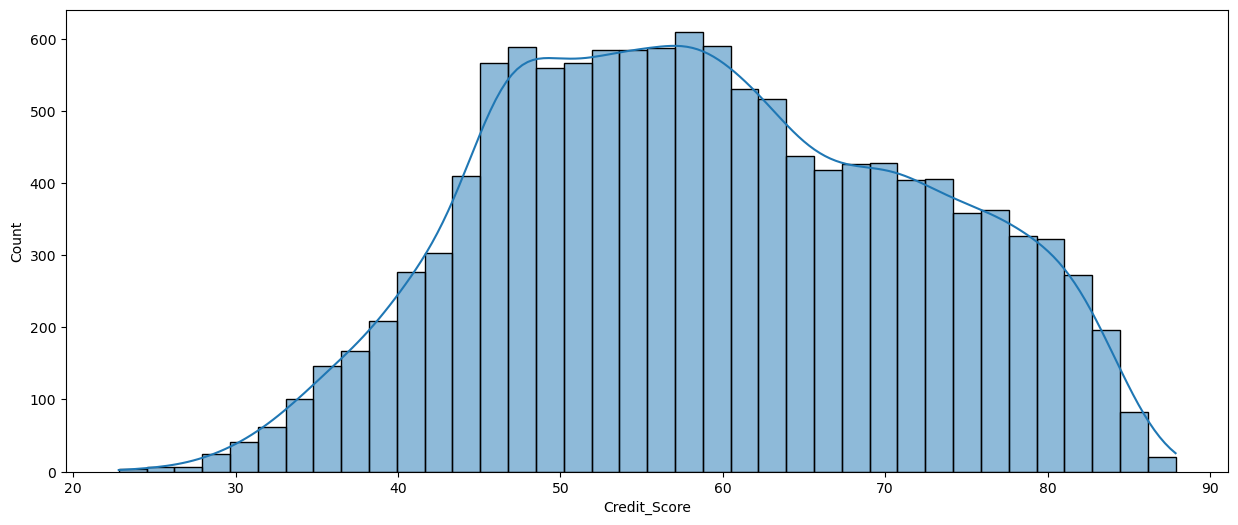

In [191]:
plt.figure(figsize=[15,6])
sns.histplot(data=df_credit_recency_cal, x='Credit_Score', kde=True)
plt.show()

In [192]:
bins = [0,42,62,76,85,100]
labels = ['Poor','Average','Fair', 'Good', 'Excellent']
df_credit_recency_cal['Credit_score_type'] = pd.cut(df_credit_recency_cal['Credit_Score'], bins=bins, labels=labels)

In [193]:
df_credit_recency_cal['Credit_score_type'].value_counts().reset_index()

,Credit_score_type,count
0,Average,6353
1,Fair,3480
2,Good,1489
3,Poor,1103
4,Excellent,75


In [195]:
df10 = df_credit_recency_cal['Credit_score_type'].value_counts().reset_index()

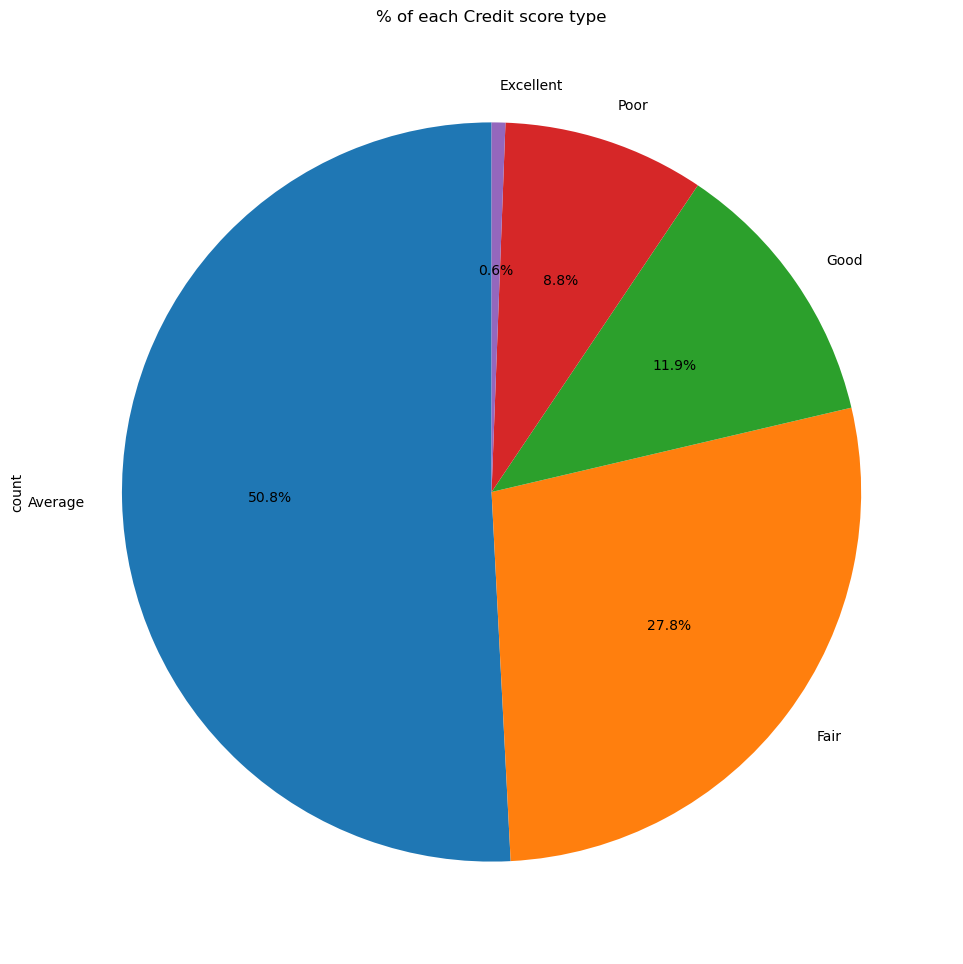

In [202]:
df10.set_index('Credit_score_type')['count'].plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(12,12),
    title='% of each Credit score type')
plt.show()

### Let see some is this data normal or not

In [136]:
from scipy import stats
import scipy.stats as spy
from scipy.stats import kruskal
import statsmodels.api as sm

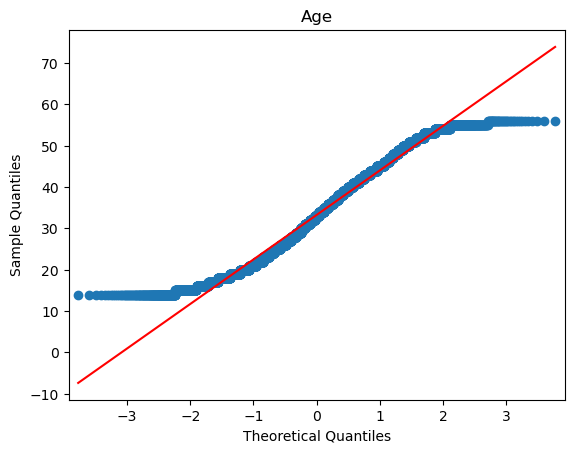

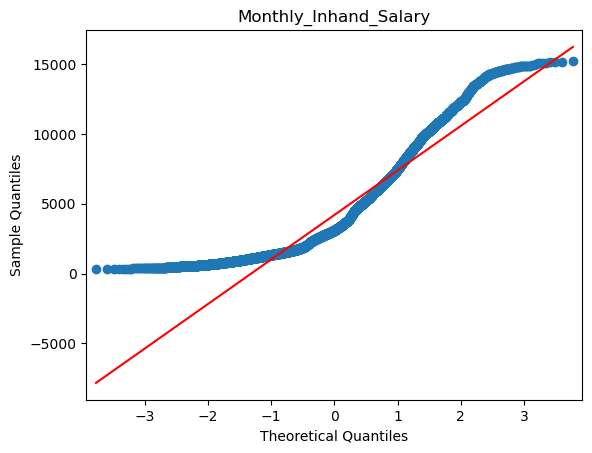

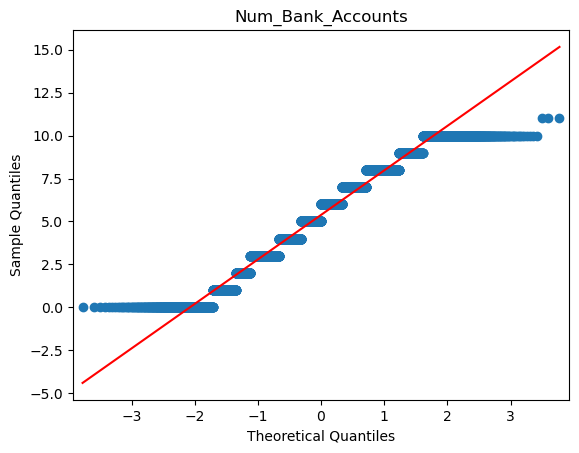

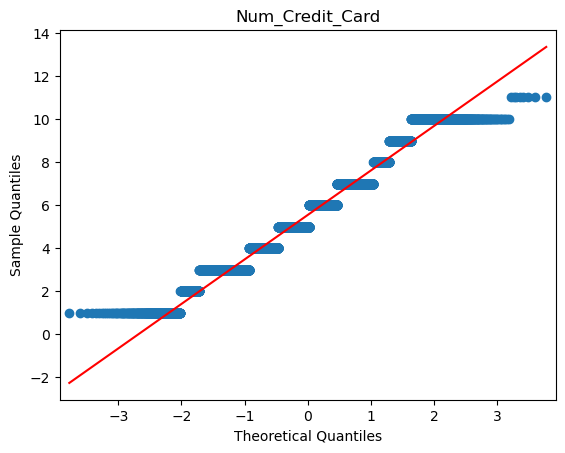

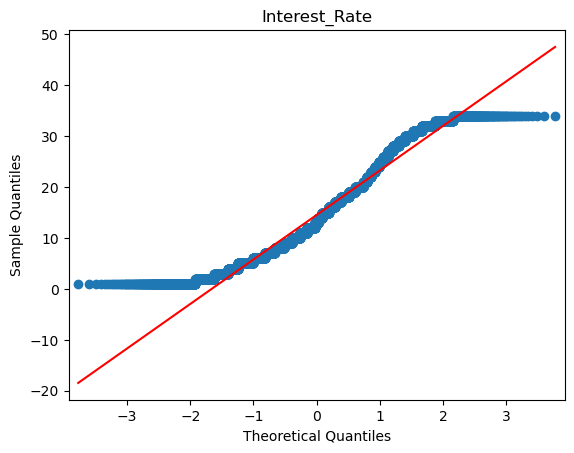

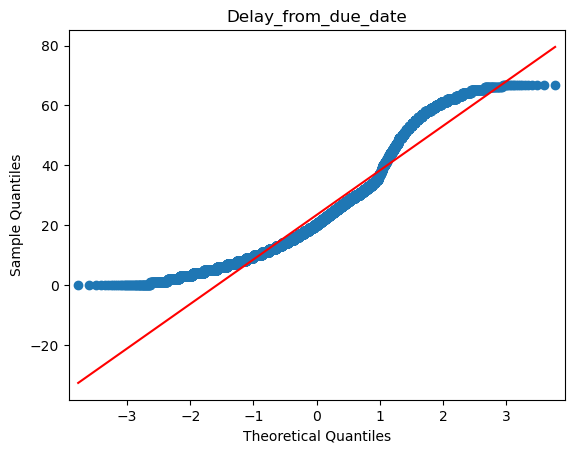

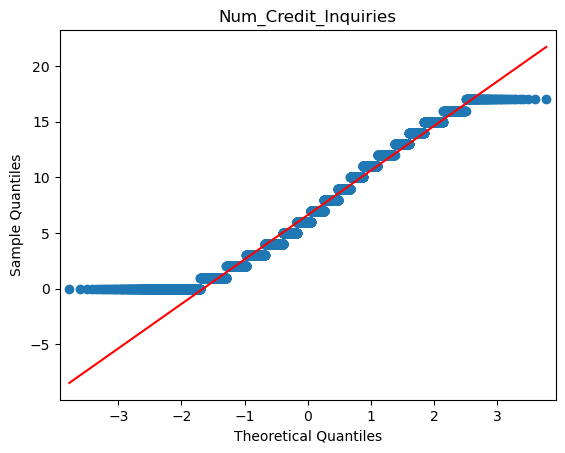

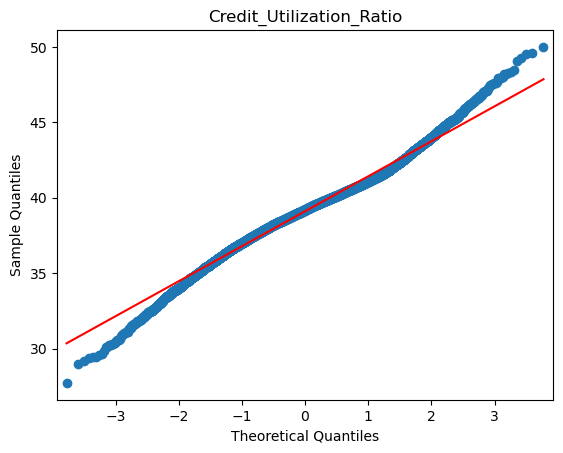

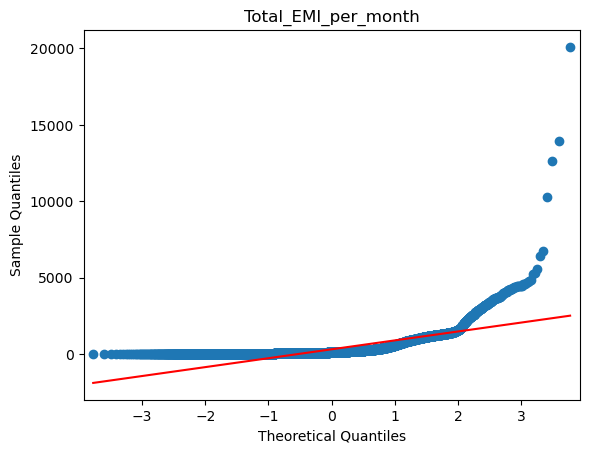

In [137]:
col3 = cleaned_df.select_dtypes(include=[int, float]).columns
for i in col3:
    sm.qqplot(num_data[i], line='s')
    plt.title(i)

plt.show()

In [138]:
from scipy.stats import shapiro 

In [139]:
# As per Shapiro wilk test
# Null phypothesis: Distribution of the data is normal.
# Alternative hypothesis: Distribution is not normal.

for i in col3:
    s,p = shapiro(num_data[i])
    print(i)
    print('P value:',p)    
    if p > 0.05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')
    print('--------------------------------------')
        

Age
P value: 5.865855720921212e-43
Reject null hypothesis
--------------------------------------
Monthly_Inhand_Salary
P value: 3.539557457553177e-70
Reject null hypothesis
--------------------------------------
Num_Bank_Accounts
P value: 4.479995158624532e-46
Reject null hypothesis
--------------------------------------
Num_Credit_Card
P value: 2.400810348507118e-47
Reject null hypothesis
--------------------------------------
Interest_Rate
P value: 1.1000545021333437e-52
Reject null hypothesis
--------------------------------------
Delay_from_due_date
P value: 3.492175323221569e-62
Reject null hypothesis
--------------------------------------
Num_Credit_Inquiries
P value: 4.111505781743282e-44
Reject null hypothesis
--------------------------------------
Credit_Utilization_Ratio
P value: 2.313438668769168e-33
Reject null hypothesis
--------------------------------------
Total_EMI_per_month
P value: 2.7261019048878417e-104
Reject null hypothesis
--------------------------------------


In [140]:
transformed_data = copy.deepcopy(num_data)

In [141]:
# lets check the min value for every numeric col
for i in col3:
    print(i)
    print(num_data[i].min())
    print('-----------------')

Age
14
-----------------
Monthly_Inhand_Salary
303.6454167
-----------------
Num_Bank_Accounts
0
-----------------
Num_Credit_Card
1
-----------------
Interest_Rate
1
-----------------
Delay_from_due_date
0
-----------------
Num_Credit_Inquiries
0
-----------------
Credit_Utilization_Ratio
27.72006589
-----------------
Total_EMI_per_month
0.0
-----------------


In [142]:
# transforming negative data to positive for applting boxcox transformation
for i in col3:
        num_data[i] = num_data[i] + 1
        transform, f_lambda = stats.boxcox(num_data[i])
        num_data[i]= transform

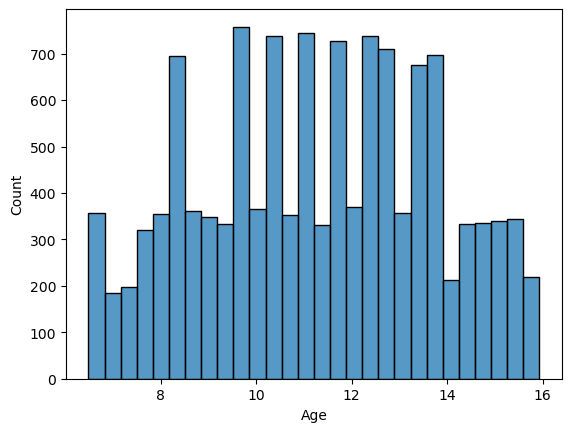

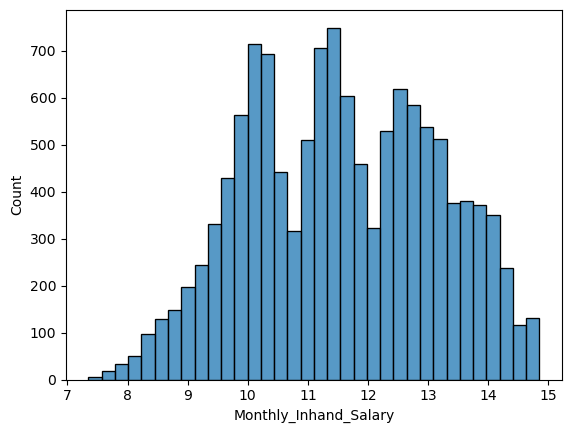

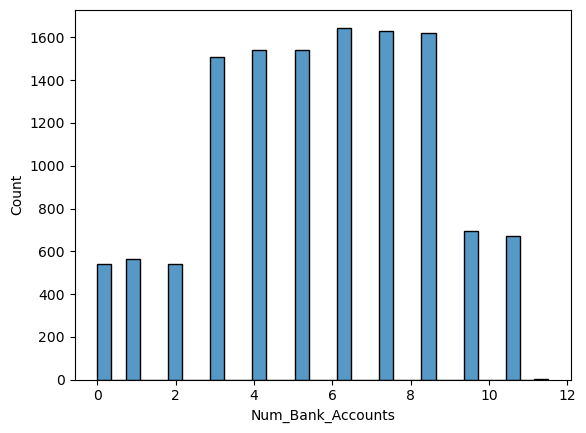

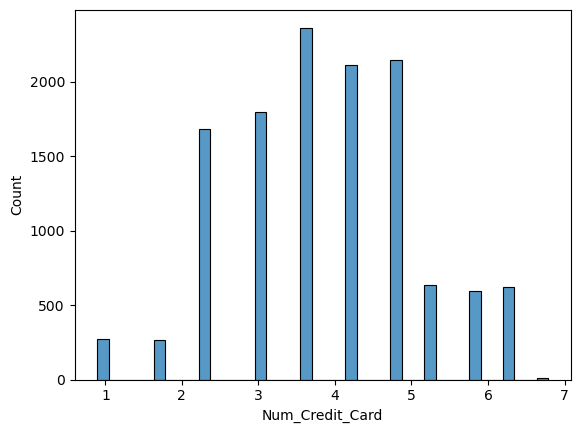

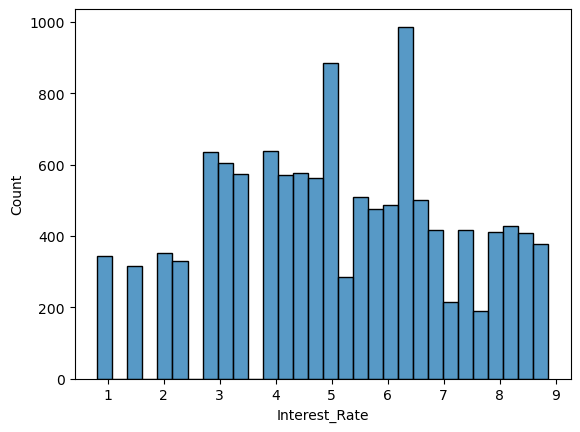

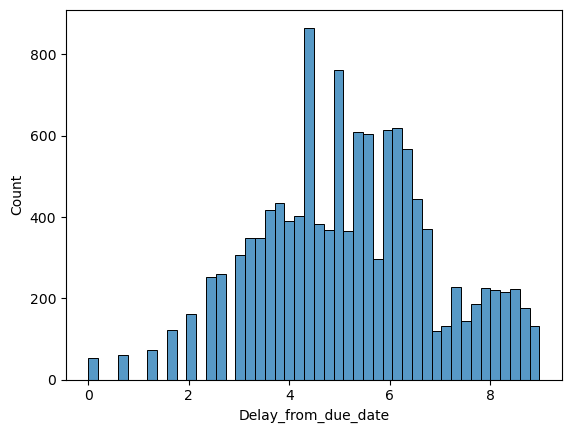

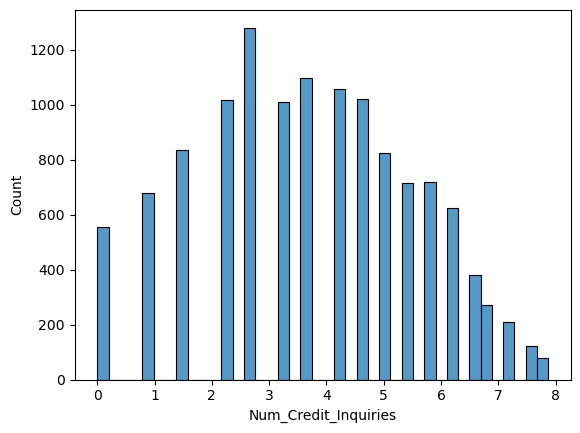

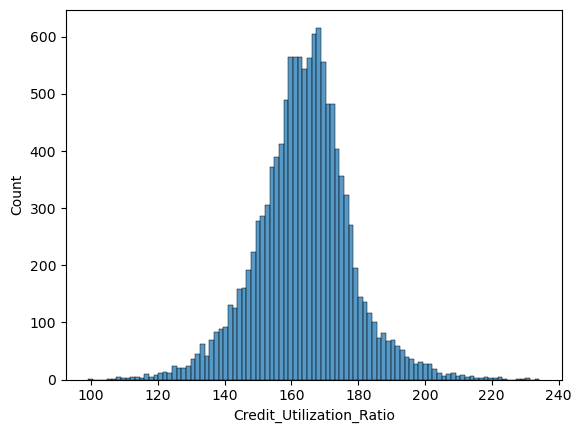

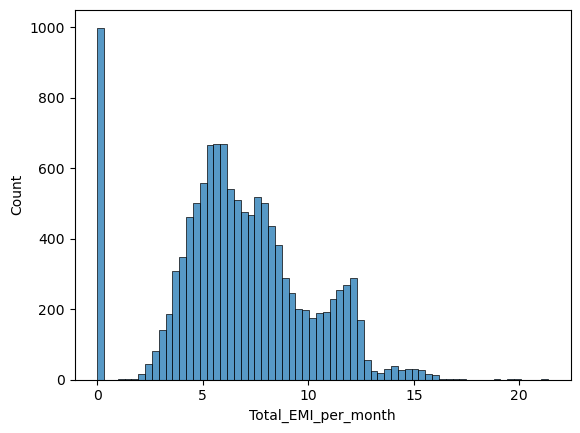

In [143]:
for i in col3:
    sns.histplot(data=num_data[i])
    plt.show()

In [144]:
# As per Shapiro wilk test
# Null phypothesis: Distribution of the data is normal.
# Alternative hypothesis: Distribution is not normal.

for i in col3:
    s,p = shapiro(num_data[i])
    print(i)
    print('P value:',p)    
    if p > 0.05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')
    print('--------------------------------------')

Age
P value: 4.514661228586061e-41
Reject null hypothesis
--------------------------------------
Monthly_Inhand_Salary
P value: 1.2432517007491417e-35
Reject null hypothesis
--------------------------------------
Num_Bank_Accounts
P value: 7.389936995592243e-46
Reject null hypothesis
--------------------------------------
Num_Credit_Card
P value: 1.8004866635538383e-45
Reject null hypothesis
--------------------------------------
Interest_Rate
P value: 1.1217186420291529e-38
Reject null hypothesis
--------------------------------------
Delay_from_due_date
P value: 1.2873558452057145e-26
Reject null hypothesis
--------------------------------------
Num_Credit_Inquiries
P value: 9.165513785262611e-38
Reject null hypothesis
--------------------------------------
Credit_Utilization_Ratio
P value: 6.346520555671713e-33
Reject null hypothesis
--------------------------------------
Total_EMI_per_month
P value: 6.774571581001314e-42
Reject null hypothesis
--------------------------------------

* We checked all the numeric columns are not normla.
* Even after applying BOXCOX transformation its not normal.

## Insights

* 11.4 percentage of people don't have nay loan.
* Almost all type of loan have same distribution close to 10% except those who don't have loan.
* People with unsecured loan is 64.3% , secured loan is 31.8% and with no loan 3.9%.
* Customer with payment behaviour Low spent small value payment is more close to 25.5% followed by High spent medium value payment with 17.5%.
* Customer with High spent Large value payment is 13.7%.
* Customer with different profession are also almost same in count between 6.4% to 7.1 with highest in Lawyers.
* Credit Mix has highest % in Standard with 45.9%, Good with 30.4% and least in Bad with 23.8%.
* We can see some relation
    - For lower annual income we have Credit history, Credit utilization, Outstanding debt info but not for higher income.
    - This show the people with lower income heavily rely on debts like loan and thus they all this info.
    - As monthly income rises credit utilization also tend to increase. They have positive correlation of 0.46.
    - Lower monthly income have high outstanding debt and Higher monthly income has less outstanding debt.
* Credit utilization ratio is mostly between 37 to 42.
* Amount invested monthly is mostly u
* Finally we can see from the credit score model we made, most of the customer have credit score between 50-60 out of 100
* In credit score, 8.3% are in poor, 50.3% are in average, 28.1% in fair, 12.8% are in good and only 0.5% are in excellent type.
* After we cheked the credit score on recency in last 3 months the change in the redit score of the customer are not significant.
* We have all numeric col are not normal..der 200 usd.

## Recommendation

Based on the insights from your data analysis, here are some fine-tuned recommendations for the organization:

### 1. **Targeted Loan Products:**
   - **Segmented Loan Offerings:** Given that 11.4% of customers don't have any loans and the majority have unsecured loans (64.3%), consider developing targeted loan products. For instance, introduce secured loan products with competitive rates to appeal to customers who primarily hold unsecured loans, offering them a transition to secured loans that might have better terms.
   - **Customized Offers:** Utilize customer segmentation based on credit behavior and payment patterns. For instance, customers with high spending on large-value payments could be offered premium credit products or larger loan amounts, whereas those with low spending on small-value payments might benefit from micro-loans or short-term credit options.

### 2. **Credit Education and Management:**
   - **Financial Literacy Programs:** Educate customers, especially those with lower incomes and higher debt reliance, about credit management, debt consolidation, and the benefits of maintaining a good credit mix. This could help in reducing their reliance on high-interest loans and improve their financial stability.
   - **Credit Score Improvement Plans:** For customers in the "Poor" and "Average" credit score categories (8.3% and 50.3%, respectively), provide personalized credit improvement plans. This might include tips on reducing credit utilization, paying down outstanding debt, and maintaining timely payments.

### 3. **Risk Management and Monitoring:**
   - **Enhanced Risk Monitoring:** Since customers with lower incomes tend to rely more on debt, implement stronger risk monitoring for this segment. This includes regular credit score reviews, especially in the last 3 to 6 months, to detect any significant changes or early signs of financial distress.
   - **Anomaly Detection:** Use the anomaly detection insights to flag potential high-risk customers or fraudulent activities. Customers with unusual credit utilization ratios or payment behaviors should be monitored more closely.

### 4. **Credit Utilization Optimization:**
   - **Incentivize Low Credit Utilization:** Encourage customers to maintain a credit utilization ratio within the optimal range (e.g., 30-35%). Offer incentives like lower interest rates or higher credit limits for those who consistently keep their utilization low, which could lead to better overall credit scores.

### 5. **Product Development and Innovation:**
   - **Investment Products:** Since the majority of customers invest less than $200 monthly, consider introducing low-risk, low-entry investment products or savings plans tailored to this demographic. This could include automated investment options with minimal barriers to entry.
   - **Dynamic Loan Products:** Introduce dynamic loan products that adapt to a customer's financial behavior. For example, loans with flexible interest rates based on credit score improvements or penalties for missed payments could incentivize better financial habits.

### 6. **Customer Experience Enhancement:**
   - **Profession-Based Offers:** Since customers from different professions have similar counts, create profession-specific financial products or offers, such as specialized loans or credit cards for lawyers, doctors, or teachers, which cater to the unique financial 

### 7. **Credit Mix Improvements:**
   - **Credit Building Programs:** With 45.9% of customers having a standard credit mix, initiate credit-building programs that encourage customers to diversify their credit profiles, improving their credit scores and financial health.fferent customer segments.

### 8. **Investment Advisory Services:**
   - **Investment Education:** With the amount invested monthly being mostly under 200 USD, offer education and advisory services on effective investment strategies that can accommodate smaller investment amounts.fferent customer segments.

By implementing these recommendations, the organization can enhance its credit offerings, improve customer satisfaction, and better manage credit risk. and better manage credit risk.g its customer base.